##### <b>Import Raw Data</b>

In [36]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=train.csv")

Skipping, found downloaded files in ".\carinsuranceclaimprediction-classification" (use force=True to force download)


#### <b>Data Loading</b>

Import Semua Library

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


Read Dataframe

In [38]:
train_df = pd.read_csv("carinsuranceclaimprediction-classification/train.csv")
test_df = pd.read_csv("carinsuranceclaimprediction-classification/test.csv")

print(train_df.shape, test_df.shape)

(58592, 44) (39063, 43)


In [39]:
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


##### <b>Exploratory Data Analysis (EDA)</b>

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [41]:
train_df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [42]:
sum_isclaim = train_df["is_claim"].value_counts()
percentage_isclaim = train_df["is_claim"].value_counts() / train_df.shape[0] * 100

for i in range(2) : 
    print(i,": ",sum_isclaim[i],"\t",percentage_isclaim[i],"%")

0 :  54844 	 93.60322228290552 %
1 :  3748 	 6.396777717094484 %


Kolom dari is_claim terlihat sangat tidak meraka. Perlu dilakukannya handling imbalance sebelum pemodelan

In [43]:
train_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [44]:
train_df.duplicated().sum()

0

Pemisahan data numerical dan categorical agar visualisasi lebih mudah

In [45]:
categorical = train_df.select_dtypes(include =[object])
categorical=categorical.drop('policy_id',axis=1)
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

numerical= train_df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)


Categorical Features in DataSet: 27
Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
Numerical Features in DataSet: 16
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


In [46]:
numerical.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0


C:\Users\hufah\AppData\Local\Temp\ipykernel_43756\2580601729.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[column],color='green')
C:\Users\hufah\AppData\Local\Temp\ipykernel_43756\2580601729.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[column],color='green')
C:\Use

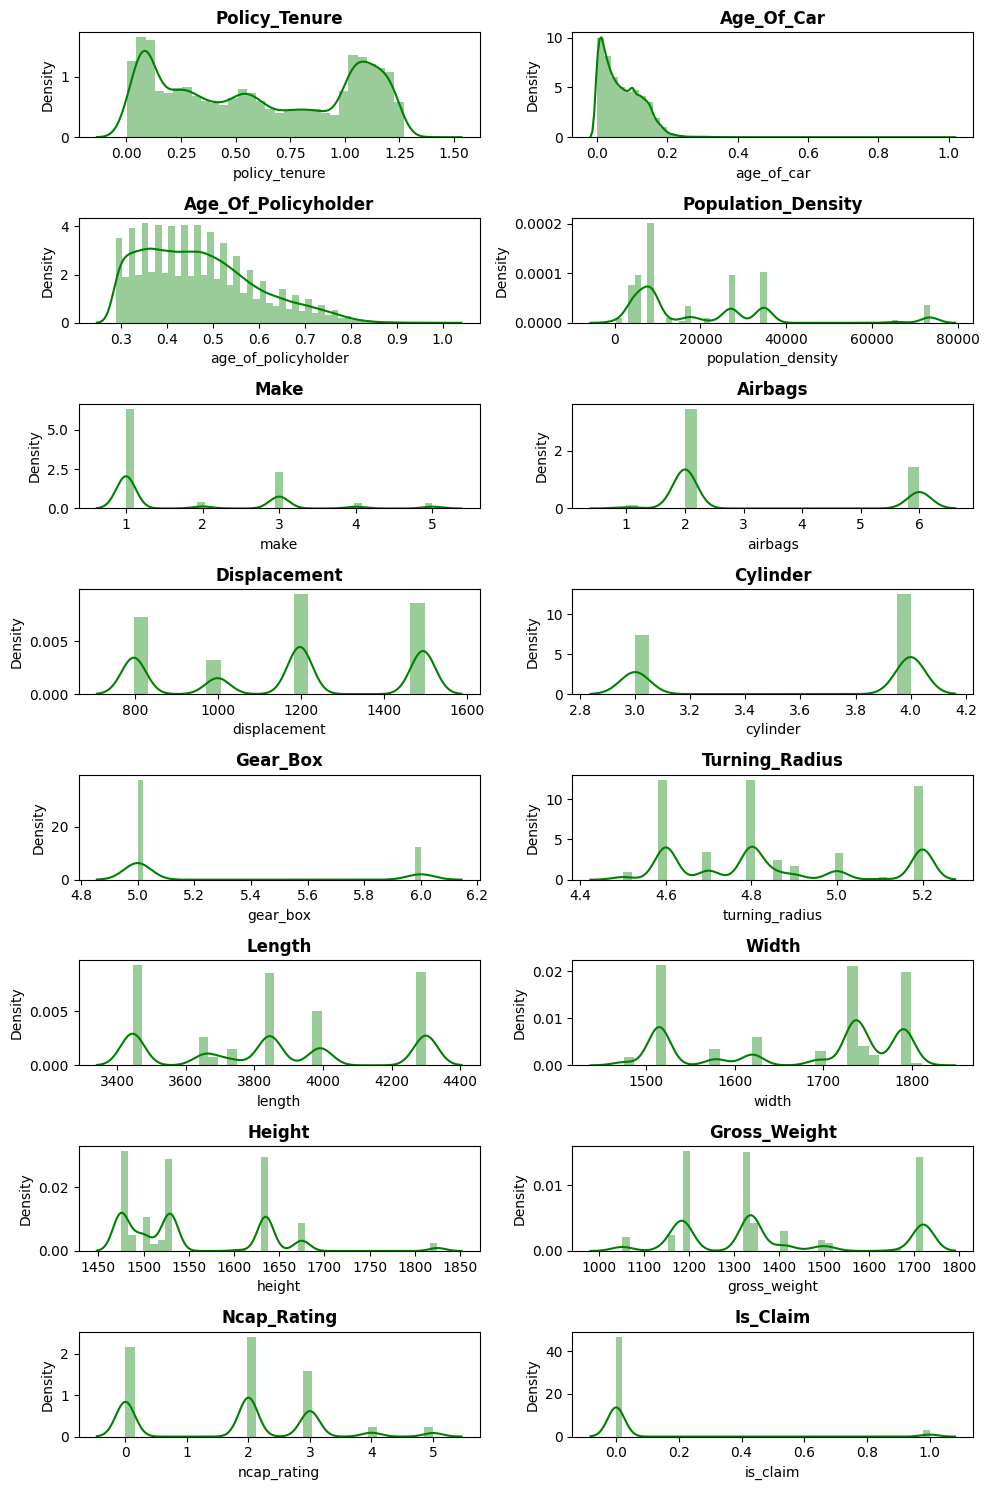

In [47]:
target = [i for i in numerical.columns]
plt.figure(figsize=(10,15))
for n,column in enumerate(target):
    plot=plt.subplot(8,2,n+1)
    sns.distplot(train_df[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()


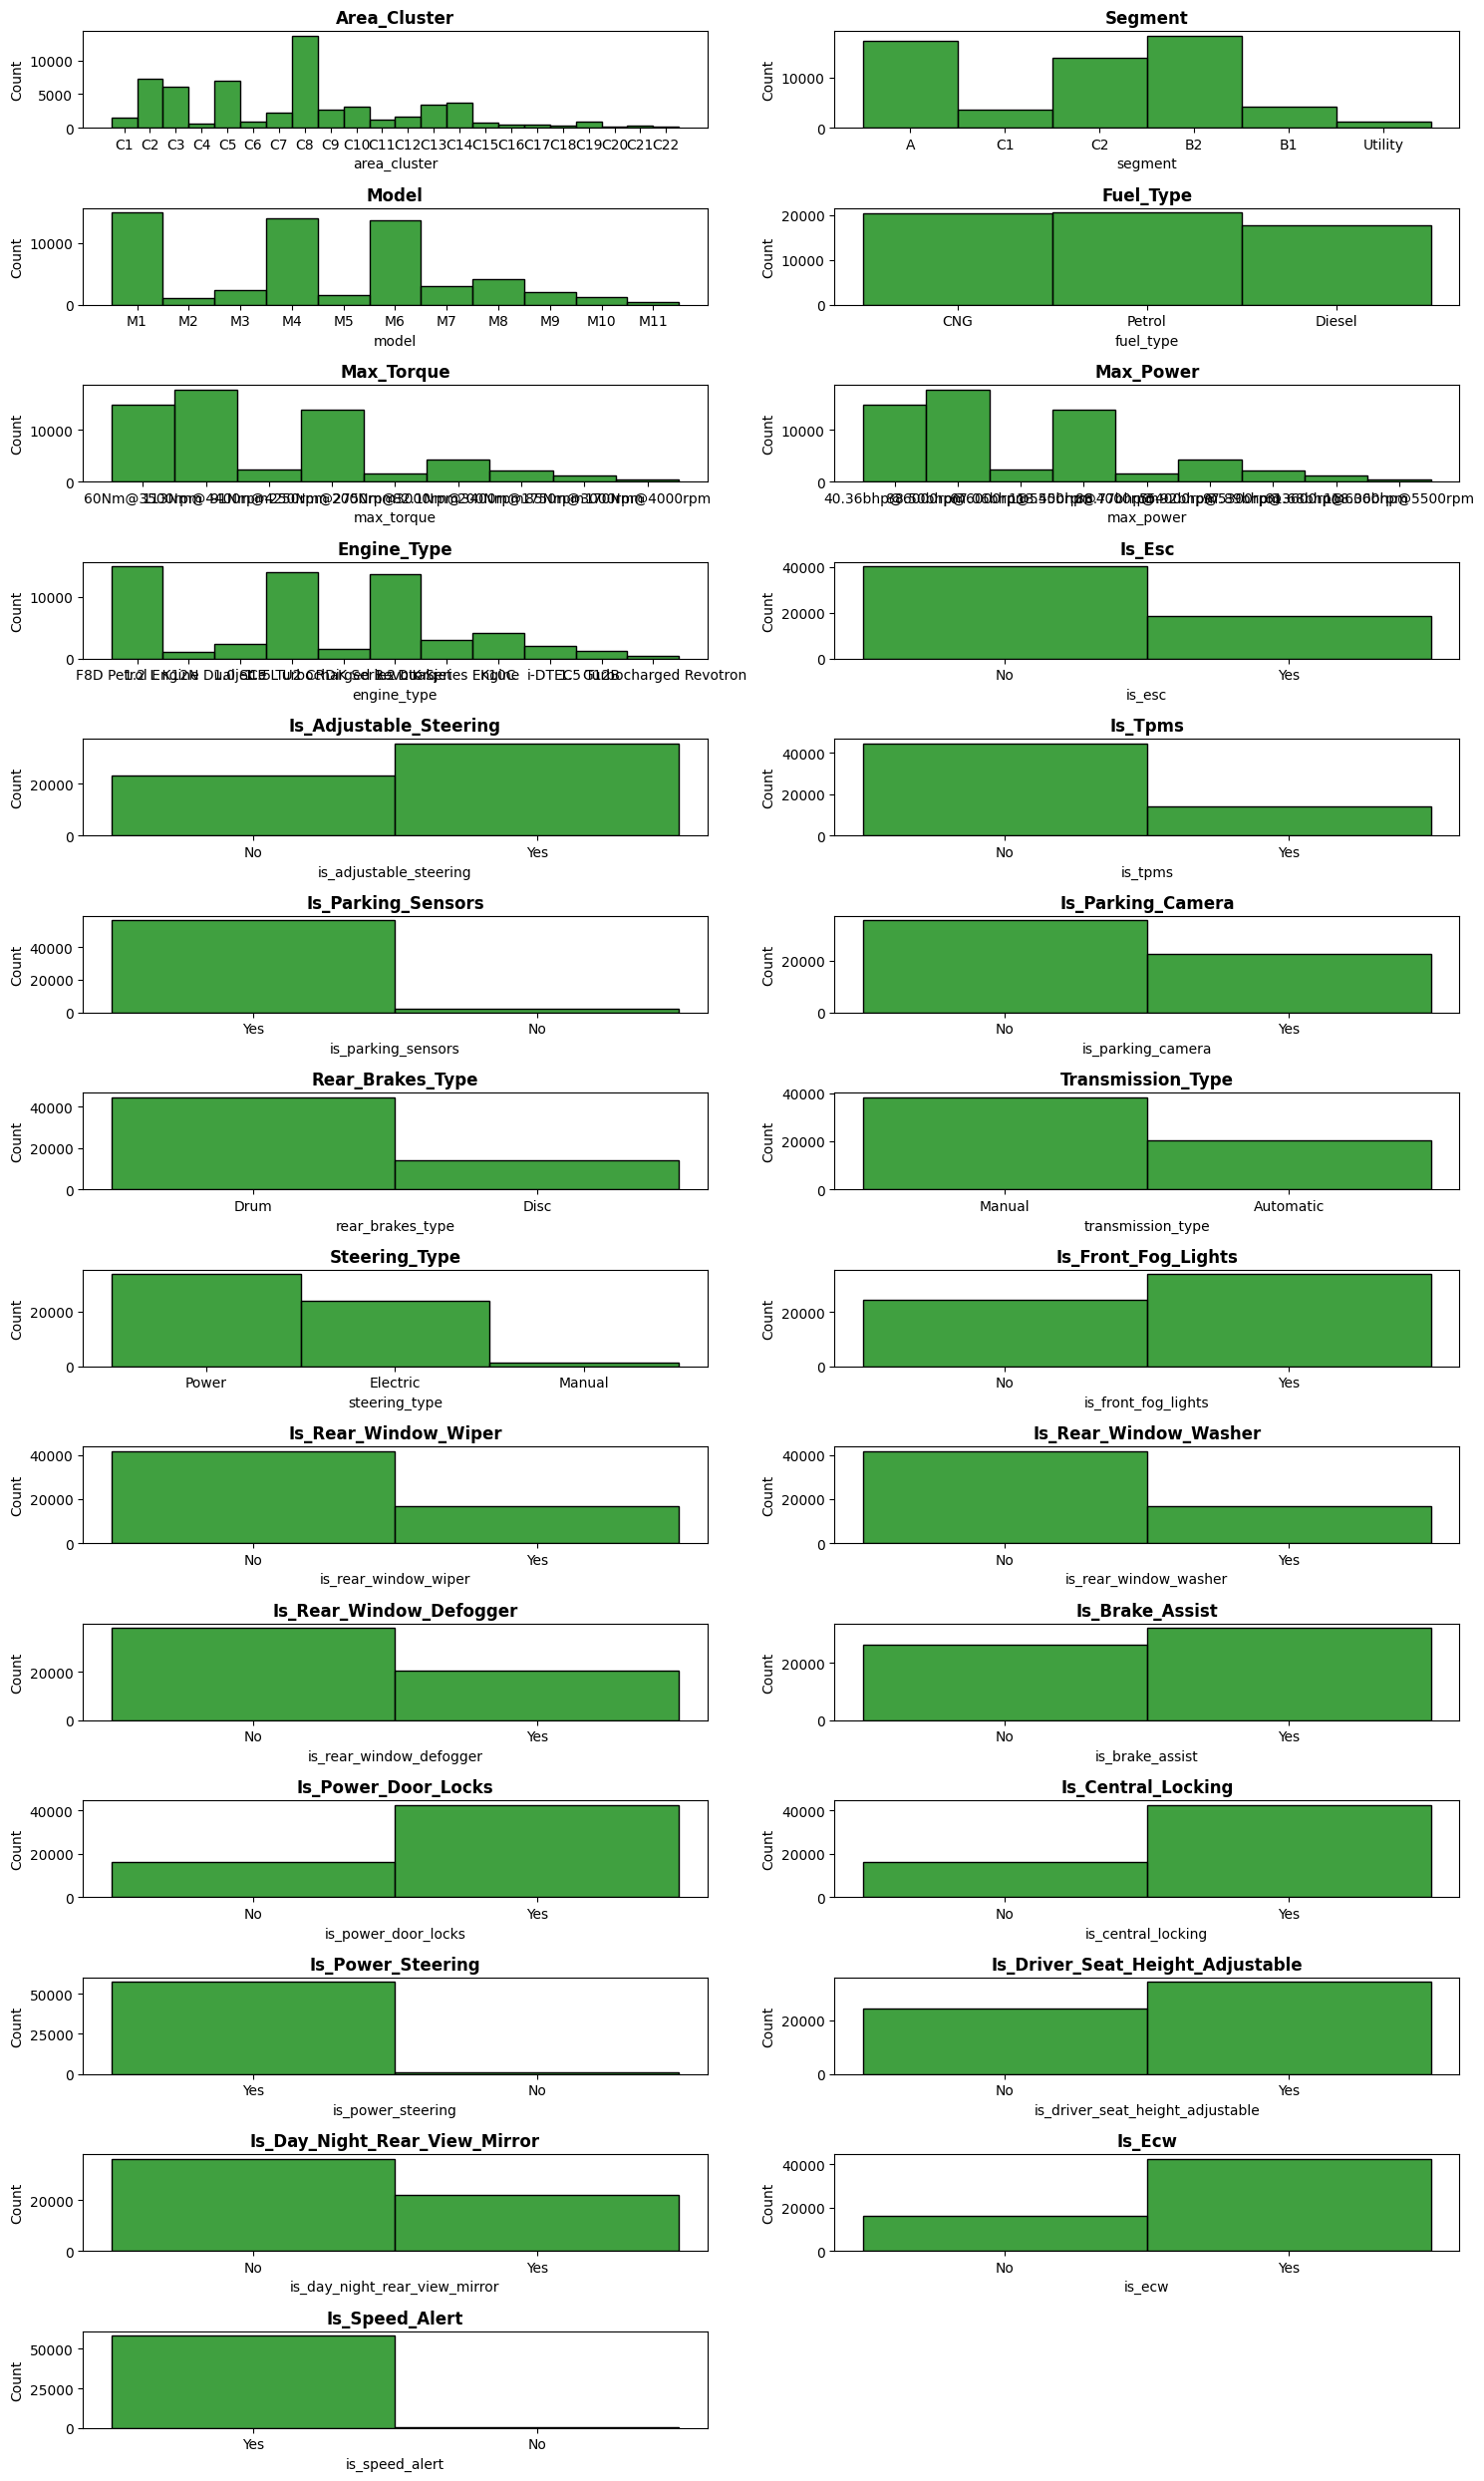

In [48]:
target = [i for i in categorical.columns]
plt.figure(figsize=(15,25))
for n,column in enumerate(target):
    plot=plt.subplot(14,2,n+1)
    sns.histplot(train_df[column], color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

In [49]:
print(train_df["max_power"].value_counts())
print(test_df["max_torque"].value_counts())

88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64
113Nm@4400rpm     11707
60Nm@3500rpm      10040
250Nm@2750rpm      9365
82.1Nm@3400rpm     2894
91Nm@4250rpm       1650
200Nm@1750rpm      1394
200Nm@3000rpm      1052
85Nm@3000rpm        725
170Nm@4000rpm       236
Name: max_torque, dtype: int64


Jenis dari 'max_torque' dan 'max_power' tidak terlalu banyak sehingga tidak perlu dikaukan pemisahan dan tetap dijadikan sebagai data categorical

##### <b>Preprocessing Data</b>

Ubah data categorical menjadi numerical dengan menggunakan label encoder

In [50]:
train_cpy = train_df.copy()
test_cpy = test_df.copy()

cols = categorical.columns
train_cpy[cols] = train_cpy[cols].apply(preprocessing.LabelEncoder().fit_transform)
test_cpy[cols] = test_cpy[cols].apply(preprocessing.LabelEncoder().fit_transform)
train_cpy.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,ID00002,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,ID00003,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,ID00004,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0
4,ID00005,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0


Pengecekan ulang dengan visualisasi untuk memastikan data tidak ada perubahan selain pemberian label

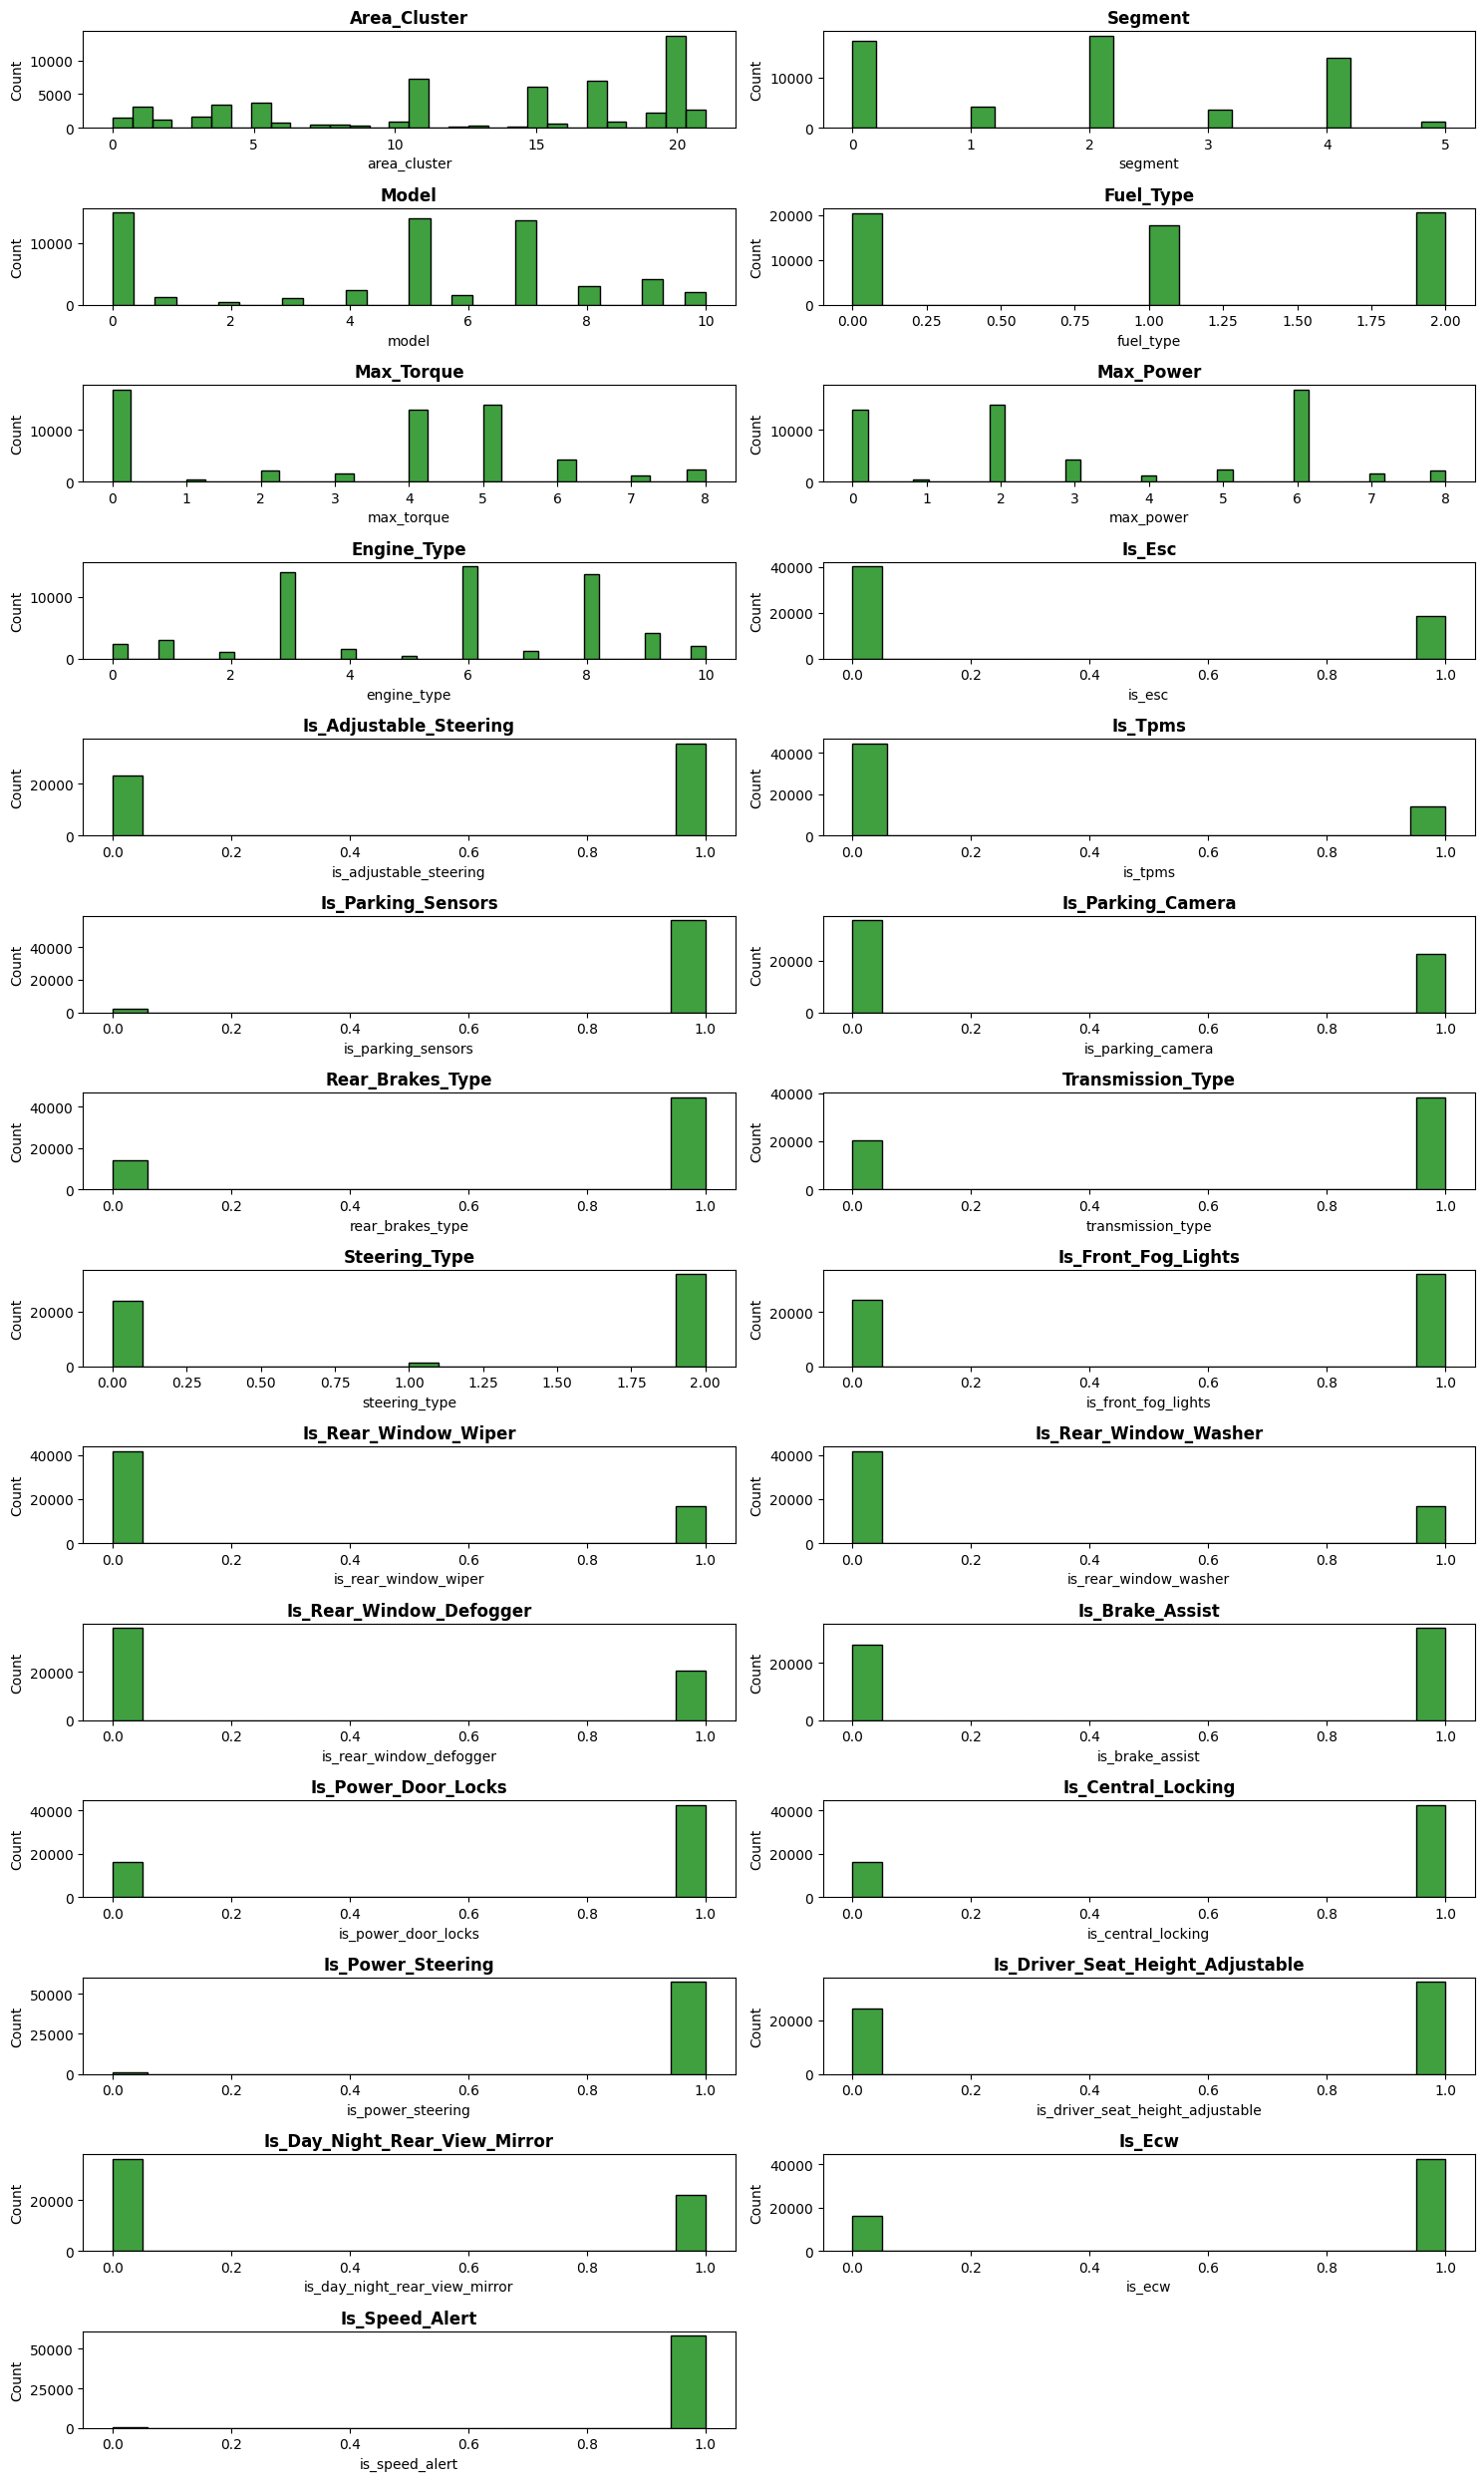

In [51]:
target = [i for i in categorical.columns]
plt.figure(figsize=(15,25))
for n,column in enumerate(target):
    plot=plt.subplot(14,2,n+1)
    sns.histplot(train_cpy[column], color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

In [52]:
train_cpy.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,ID00002,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,ID00003,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,ID00004,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0
4,ID00005,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0


In [53]:
test_cpy.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,15,4076,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,ID58594,0.307241,0.13,0.442308,20,8794,1,2,7,2,...,0,1,1,1,1,1,1,1,1,2
2,ID58595,0.327924,0.12,0.451923,20,8794,2,0,4,2,...,0,0,1,1,1,0,1,1,1,2
3,ID58596,0.782654,0.01,0.461538,17,34738,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,ID58597,1.233404,0.02,0.634615,17,34738,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [54]:
train_cpy = train_cpy.drop(columns=['policy_id'])
train_cpy.shape
train_cpy.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0


In [55]:
train_cpy.shape

(58592, 43)

Pengecekan korelasi fitur dengan menggunakan heatmap

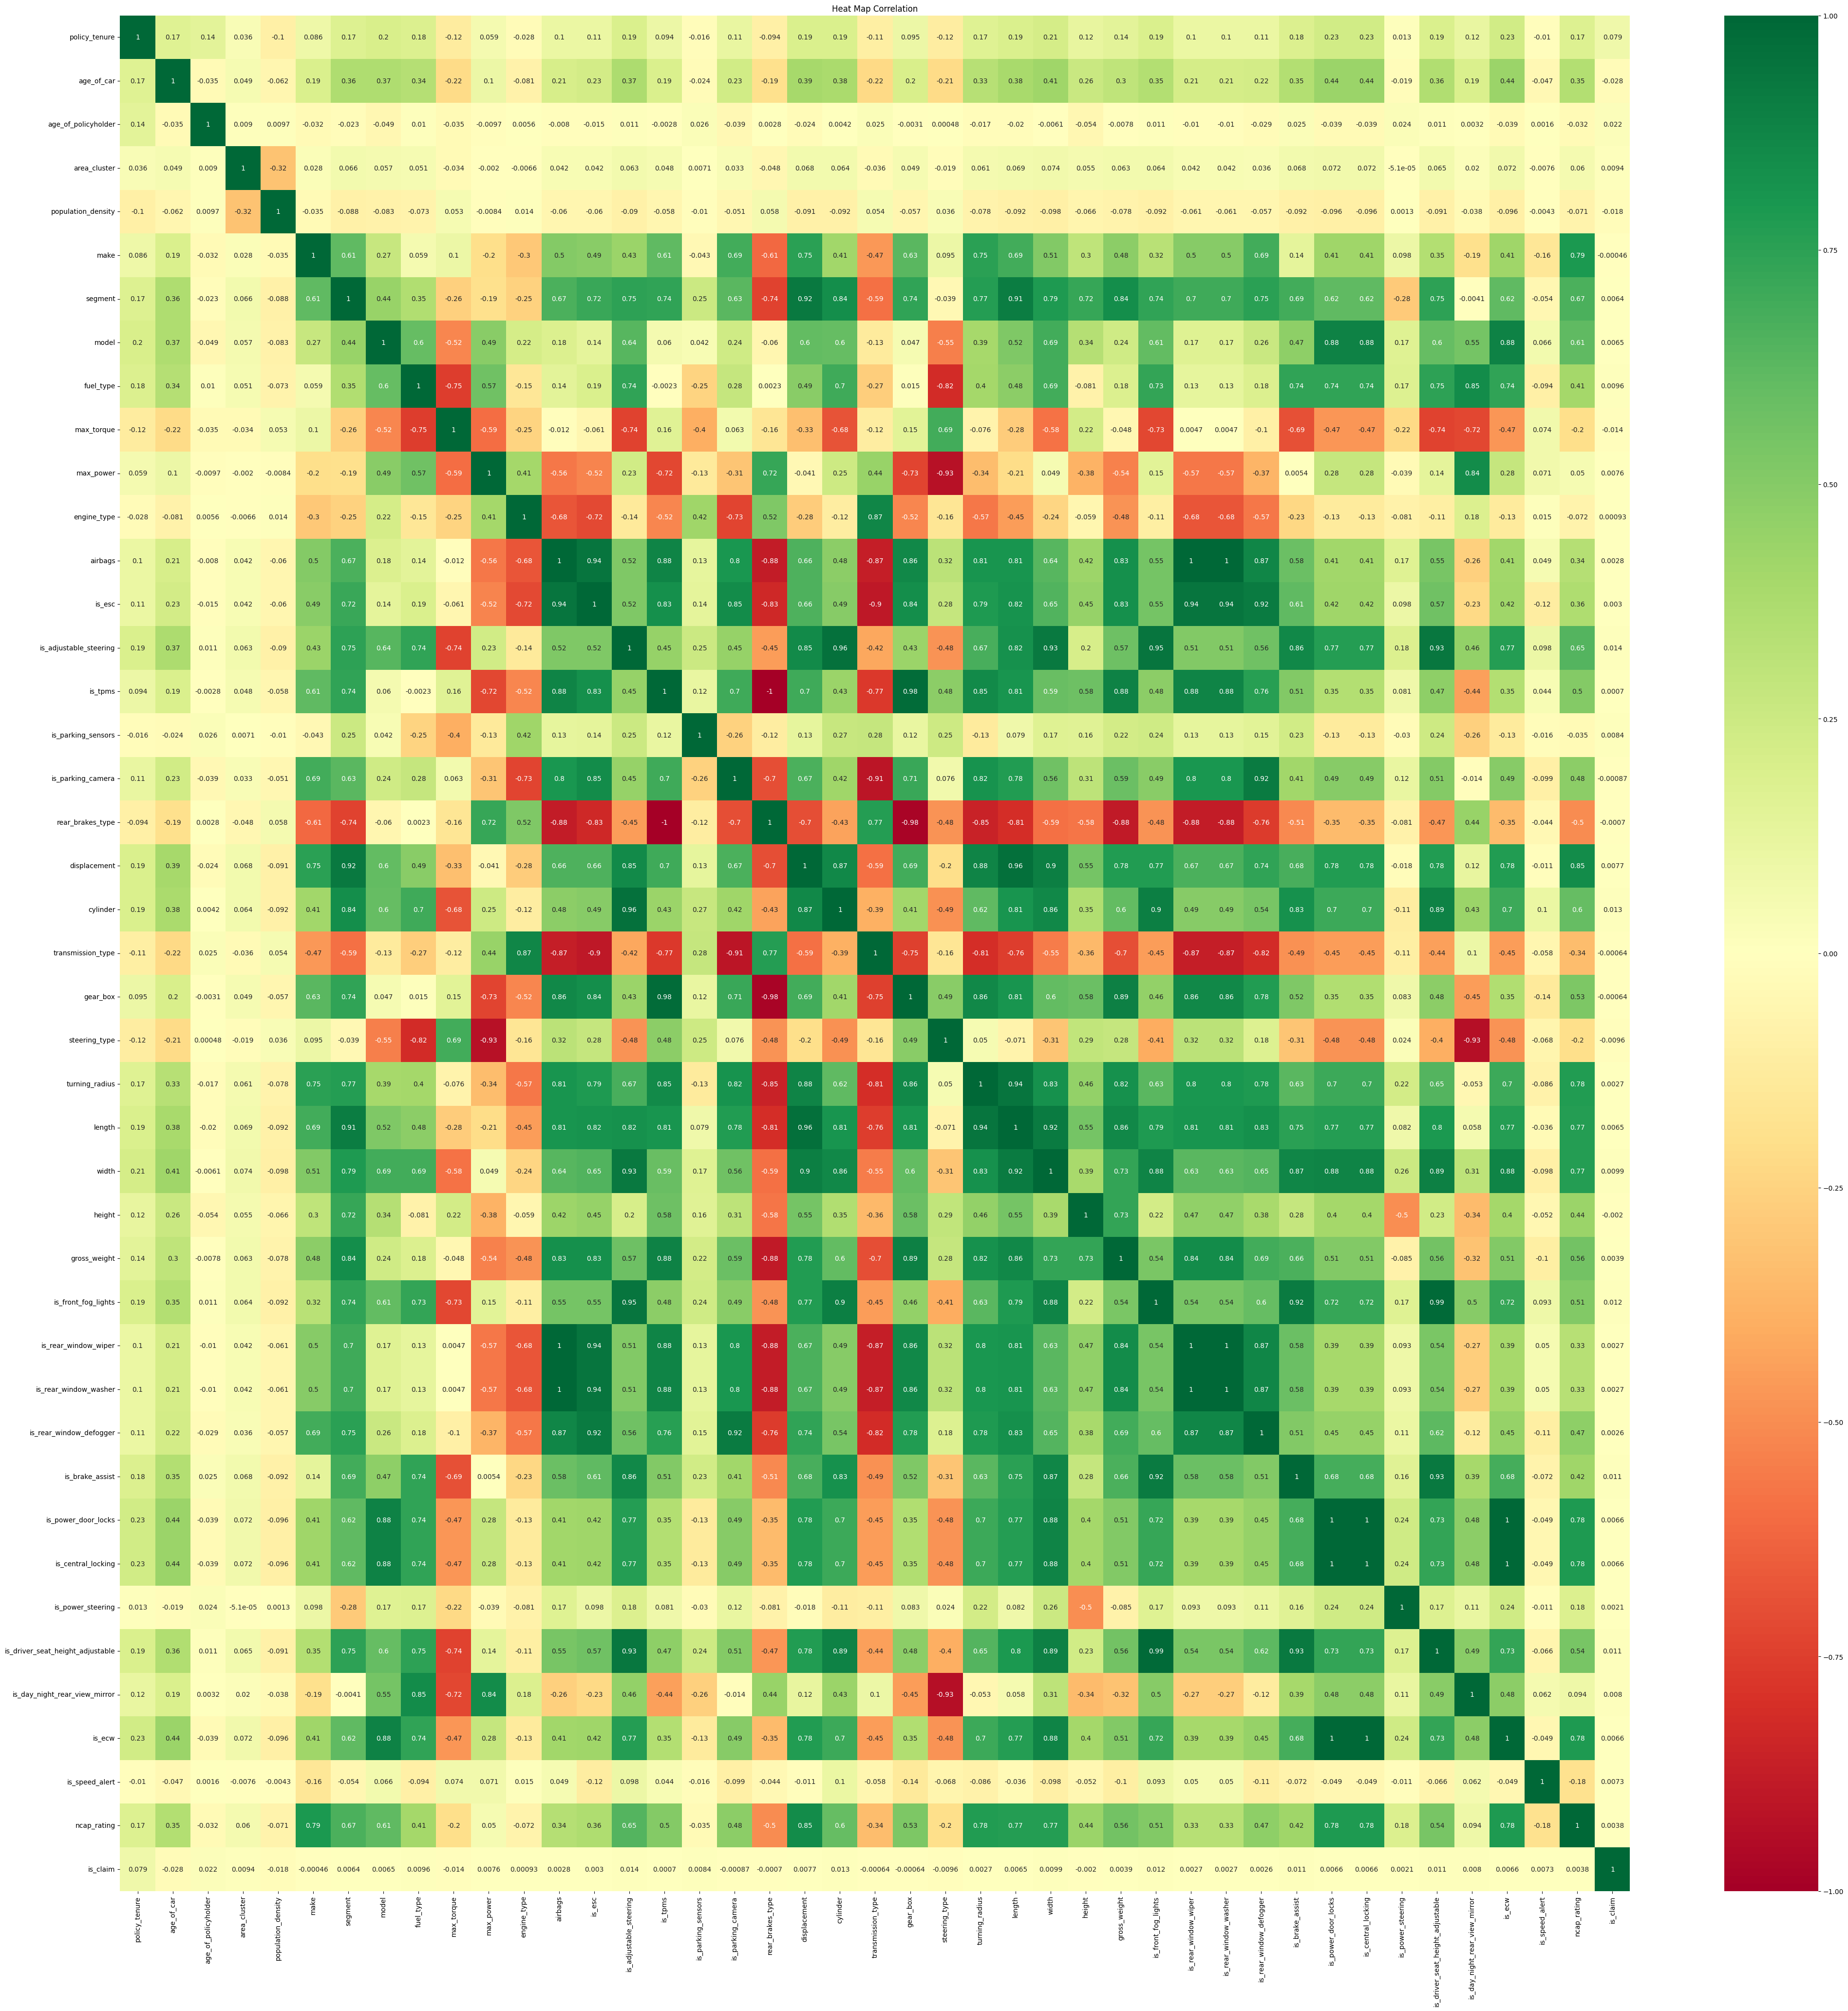

In [56]:
train_corr= train_cpy.corr()
round(train_corr, 2)
top_corr_features = train_corr.index
plt.figure(figsize=(50,50))
plt.title("Heat Map Correlation")
g=sns.heatmap(train_cpy[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Penghapusan fitur dengan nilai korelasi rendah (dua nol dibelakang koma ke bawah, ex: 0.0094(area_cluster)) agar model lebih akurat

In [57]:
X=train_cpy.drop(columns=['is_claim',"make","engine_type",
                     "is_tpms","is_parking_camera","rear_brakes_type", "transmission_type",
                     "gear_box",
                     "area_cluster", "segment", "model", "fuel_type", "airbags", "is_esc", "is_parking_sensors",
                     "displacement", "steering_type", "turning_radius", "length", "width", "height", "gross_weight",
                     "is_rear_window_wiper", "is_rear_window_washer", "is_rear_window_defogger",
                     "is_power_door_locks", "is_central_locking", "is_power_steering", "is_day_night_rear_view_mirror",
                     "is_ecw", "is_speed_alert", "ncap_rating"])
y=train_cpy['is_claim']

test_policy_id=test_cpy['policy_id']
test_preprocessed=test_cpy.drop(columns=['policy_id',"make","engine_type",
                     "is_tpms","is_parking_camera","rear_brakes_type", "transmission_type",
                     "gear_box",
                     "area_cluster", "segment", "model", "fuel_type", "airbags", "is_esc", "is_parking_sensors",
                     "displacement", "steering_type", "turning_radius", "length", "width", "height", "gross_weight",
                     "is_rear_window_wiper", "is_rear_window_washer", "is_rear_window_defogger",
                     "is_power_door_locks", "is_central_locking", "is_power_steering", "is_day_night_rear_view_mirror",
                     "is_ecw", "is_speed_alert", "ncap_rating"])

Handling Imbalance dengan menggunakan metode oversampling

In [58]:
os =  RandomOverSampler(random_state=42, sampling_strategy=0.8)
X_res, y_res = os.fit_resample(X, y)
X_res.shape,y_res.shape

((98719, 11), (98719,))

Normalisasi data yang sudah dilakukan oversampling dengan standard scaler

In [59]:
scaler=StandardScaler()
X_res=scaler.fit_transform(X_res)
test_preprocessed=scaler.transform(test_preprocessed)

In [60]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 54844, 1: 3748})
Resampled dataset shape Counter({0: 54844, 1: 43875})


##### <b>Preprocessed Data<b>

In [61]:
X_res

array([[-0.35516826, -0.30571442,  1.37365366, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       [ 0.02784549, -0.84872532, -0.79355603, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       [ 0.43956315, -0.84872532, -0.71615568, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       ...,
       [ 0.90584623,  0.23729648, -0.56135499, ...,  0.83769265,
         0.8906884 ,  0.82828932],
       [ 0.83434809,  1.14231464, -0.63875534, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       [-0.21942201, -0.30571442,  0.36744916, ...,  0.83769265,
         0.8906884 ,  0.82828932]])

In [62]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
98714    1
98715    1
98716    1
98717    1
98718    1
Name: is_claim, Length: 98719, dtype: int64

In [63]:
test_preprocessed

array([[-0.78069238, -1.21073258,  0.90925159, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       [-0.86497093,  1.14231464, -0.2517536 , ...,  0.83769265,
         0.8906884 ,  0.82828932],
       [-0.81443266,  0.96131101, -0.17435326, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       ...,
       [-0.34438298,  0.96131101, -0.94835672, ...,  0.83769265,
         0.8906884 ,  0.82828932],
       [ 1.24906362,  0.23729648,  1.37365366, ...,  0.83769265,
         0.8906884 ,  0.82828932],
       [-1.38596263,  0.96131101, -1.33535845, ...,  0.83769265,
         0.8906884 ,  0.82828932]])

##### <b>Data Modelling</b>

Splitting Data untuk testing dan training

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size = 0.2, random_state = 1)

In [65]:
print('Data train : ', X_train.shape, y_train.shape)
print('Data test : ', X_test.shape, y_test.shape)

Data train :  (78975, 11) (78975,)
Data test :  (19744, 11) (19744,)


<b>Random Forest Classifier</b>

In [66]:
rf = make_pipeline(RandomForestClassifier(random_state=1))
params = {"randomforestclassifier__n_estimators":range(25,125,25)}

In [67]:
Model_rf = GridSearchCV(rf,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': range(25, 125, 25)},
             verbose=1)

In [68]:
print("Model Best Score: ", Model_rf.best_score_)
print("Model Best Params: ", Model_rf.best_params_)

Model Best Score:  0.9818930041152264
Model Best Params:  {'randomforestclassifier__n_estimators': 100}


In [69]:
train_pred_rf=Model_rf.predict(X_train)
train_accuracy_score_rf = accuracy_score(y_train,train_pred_rf)

test_pred_rf=Model_rf.predict(X_test)
test_accuracy_score_rf = accuracy_score(y_test,test_pred_rf)

print('Random Forest Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_rf)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_rf)

Random Forest Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
98.68820907617504


Text(0.5, 1.0, 'Random Forrest Classifier Confusion Matrix')

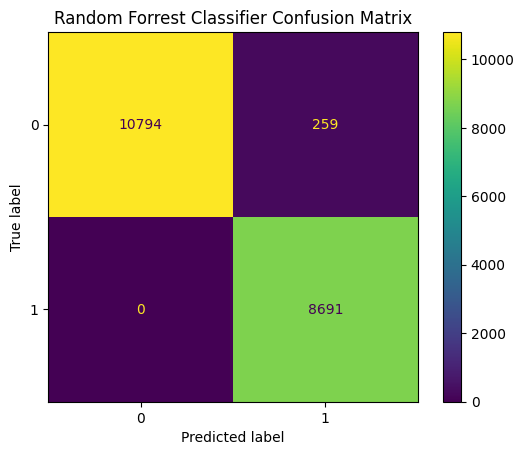

In [70]:
cm = ConfusionMatrixDisplay.from_estimator(Model_rf, X_test, y_test);
cm.ax_.set_title('Random Forrest Classifier Confusion Matrix')
plt.grid(False)

<b>Decision Tree Classifier</b>

In [71]:
dt = make_pipeline(DecisionTreeClassifier(random_state=1))
params = [{"decisiontreeclassifier__criterion":["gini", "entropy", "log_loss"], "decisiontreeclassifier__splitter":["best","random"]}]
# params = [
#  {'criterion': ["gini", "entropy", "log_loss"], 'splitter': ["best", "random"]}
# ]

In [72]:
Model_dt = GridSearchCV(dt,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_dt.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'decisiontreeclassifier__criterion': ['gini',
                                                                'entropy',
                                                                'log_loss'],
                          'decisiontreeclassifier__splitter': ['best',
                                                               'random']}],
             verbose=1)

In [73]:
print("Model Best Score: ", Model_dt.best_score_)
print("Model Best Params: ", Model_dt.best_params_)

Model Best Score:  0.9467046533713199
Model Best Params:  {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__splitter': 'best'}


In [74]:
train_pred_dt=Model_dt.predict(X_train)
train_accuracy_score_dt = accuracy_score(y_train,train_pred_dt)

test_pred_dt=Model_dt.predict(X_test)
test_accuracy_score_dt = accuracy_score(y_test,test_pred_dt)

print('Decision Tree Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_dt)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_dt)

Decision Tree Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
95.53788492706646


Text(0.5, 1.0, 'Decision Tree Classifier Confusion Matrix')

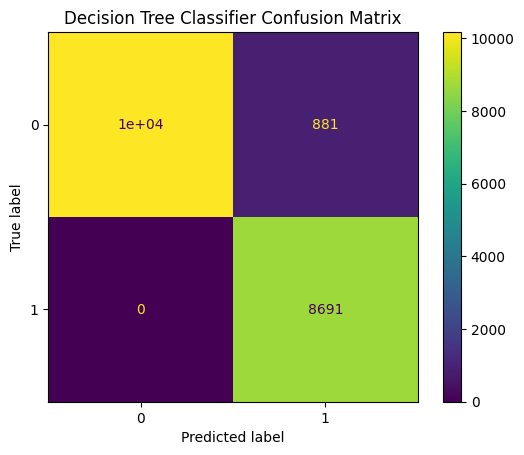

In [75]:
cm = ConfusionMatrixDisplay.from_estimator(Model_dt, X_test, y_test);
cm.ax_.set_title('Decision Tree Classifier Confusion Matrix')
plt.grid(False)

<b>Extra Trees Classifier</b>

In [76]:
et = make_pipeline(ExtraTreesClassifier(random_state=1))
params = [{'extratreesclassifier__n_estimators':range(25,125,25), 'extratreesclassifier__criterion':['gini', 'entropy', 'log_loss']}]

In [77]:
Model_et = GridSearchCV(et,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_et.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'extratreesclassifier__criterion': ['gini', 'entropy',
                                                              'log_loss'],
                          'extratreesclassifier__n_estimators': range(25, 125, 25)}],
             verbose=1)

In [78]:
print("Model Best Score: ", Model_et.best_score_)
print("Model Best Params: ", Model_et.best_params_)

Model Best Score:  0.9911744222855333
Model Best Params:  {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 100}


In [79]:
train_pred_et=Model_et.predict(X_train)
train_accuracy_score_et = accuracy_score(y_train,train_pred_et)

test_pred_et=Model_et.predict(X_test)
test_accuracy_score_et = accuracy_score(y_test,test_pred_et)

print('Extra Trees Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_et)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_et)

Extra Trees Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
99.41247974068071


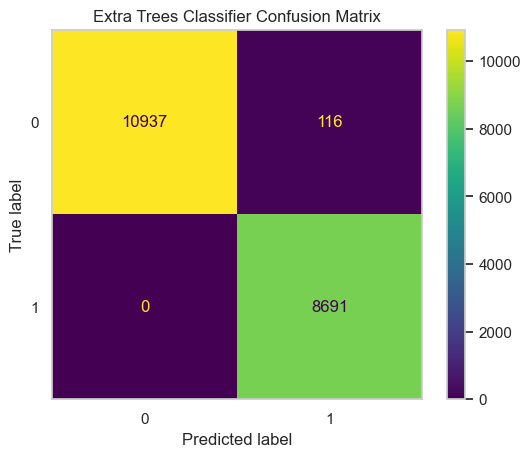

In [157]:
cm = ConfusionMatrixDisplay.from_estimator(Model_et, X_test, y_test);
cm.ax_.set_title('Extra Trees Classifier Confusion Matrix')
plt.grid(False)

<b>Gradient Boosting Classifier</b>

In [81]:
gb = make_pipeline(GradientBoostingClassifier(random_state=1))
params = [{'gradientboostingclassifier__loss':['log_loss', 'deviance', 'exponential'], 'gradientboostingclassifier__criterion':['friedman_mse', 'squared_error']}]

In [82]:
Model_gb = GridSearchCV(gb,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_gb.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'gradientboostingclassifier__criterion': ['friedman_mse',
                                                                    'squared_error'],
                          'gradientboostingclassifier__loss': ['log_loss',
                                                               'deviance',
                                                               'exponential']}],
             verbose=1)

In [83]:
print("Model Best Score: ", Model_gb.best_score_)
print("Model Best Params: ", Model_gb.best_params_)

Model Best Score:  0.631579613801836
Model Best Params:  {'gradientboostingclassifier__criterion': 'friedman_mse', 'gradientboostingclassifier__loss': 'log_loss'}


In [84]:
train_pred_gb=Model_gb.predict(X_train)
train_accuracy_score_gb = accuracy_score(y_train,train_pred_gb)

test_pred_gb=Model_gb.predict(X_test)
test_accuracy_score_gb = accuracy_score(y_test,test_pred_gb)

print('Gradient Boosting Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_gb)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_gb)

Gradient Boosting Classifier
Accuracy for Training set using accuracy score is
63.369420702754034
----------------------------------
Accuracy for Testing set using accuracy score is
63.16349270664505


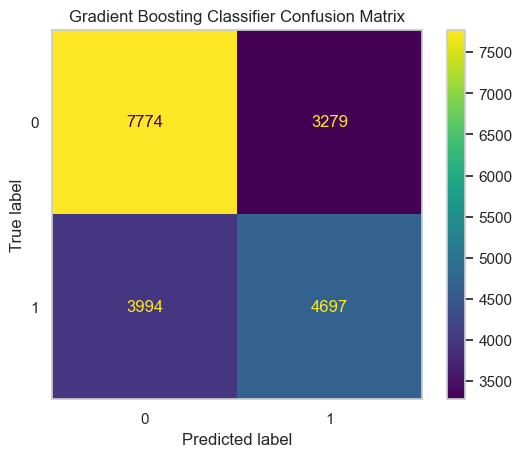

In [158]:
cm = ConfusionMatrixDisplay.from_estimator(Model_gb, X_test, y_test);
cm.ax_.set_title('Gradient Boosting Classifier Confusion Matrix')
plt.grid(False)

<b>XGB Classifier</b>

In [86]:
xgb = make_pipeline(XGBClassifier())
params = [{}]

In [87]:
Model_xgb = GridSearchCV(xgb,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1, param_grid=[{}], verbose=1)

In [88]:
print("Model Best Score: ", Model_xgb.best_score_)
print("Model Best Params: ", Model_xgb.best_params_)

Model Best Score:  0.7606710984488763
Model Best Params:  {}


In [89]:
train_pred_xgb=Model_xgb.predict(X_train)
train_accuracy_score_xgb = accuracy_score(y_train,train_pred_xgb)
train_f1_score_xgb=f1_score(y_train,train_pred_xgb)

#Testing set performance

test_pred_xgb=Model_xgb.predict(X_test)
test_accuracy_score_xgb = accuracy_score(y_test,test_pred_xgb)
test_f1_score_xgb=f1_score(y_test,test_pred_xgb)

print('XGB Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_xgb)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_xgb)

XGB Classifier
Accuracy for Training set using accuracy score is
78.66160177271288
----------------------------------
Accuracy for Testing set using accuracy score is
75.86102106969206


Text(0.5, 1.0, 'XGB Classifier Confusion Matrix')

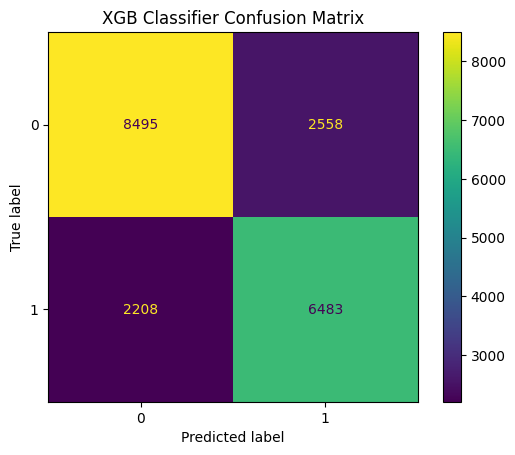

In [90]:
cm = ConfusionMatrixDisplay.from_estimator(Model_xgb, X_test, y_test);
cm.ax_.set_title('XGB Classifier Confusion Matrix')
plt.grid(False)

<b>LGBM Classifier</b>

In [91]:
lgb = make_pipeline(LGBMClassifier(random_state=1))
params = [{}]

In [92]:
Model_lgb = GridSearchCV(lgb,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('lgbmclassifier',
                                        LGBMClassifier(random_state=1))]),
             n_jobs=-1, param_grid=[{}], verbose=1)

In [93]:
print("Model Best Score: ", Model_lgb.best_score_)
print("Model Best Params: ", Model_lgb.best_params_)

Model Best Score:  0.6906489395378286
Model Best Params:  {}


In [94]:
train_pred_lgb=Model_lgb.predict(X_train)
train_accuracy_score_lgb = accuracy_score(y_train,train_pred_lgb)

test_pred_lgb=Model_lgb.predict(X_test)
test_accuracy_score_lgb = accuracy_score(y_test,test_pred_lgb)
print('LGMB Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_lgb)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_lgb)

LGMB Classifier
Accuracy for Training set using accuracy score is
70.98955365622032
----------------------------------
Accuracy for Testing set using accuracy score is
69.50972447325769


Text(0.5, 1.0, 'LGBMClassifier Confusion Matrix')

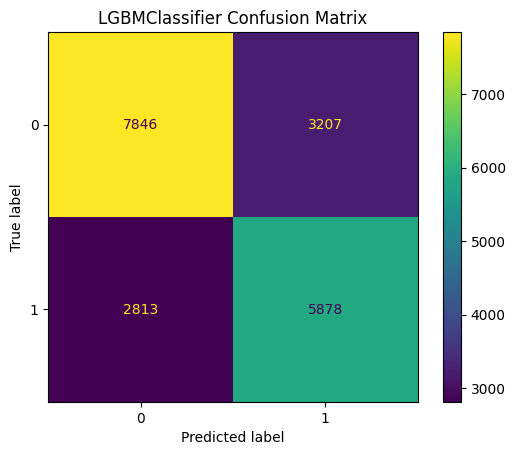

In [95]:
cm = ConfusionMatrixDisplay.from_estimator(Model_lgb, X_test, y_test);
cm.ax_.set_title('LGBMClassifier Confusion Matrix')
plt.grid(False)

<b>AdaBoost Classifier</b>

In [96]:
ada = make_pipeline(AdaBoostClassifier(random_state=1))
params = [{'adaboostclassifier__n_estimators':range(25,125,25), 'adaboostclassifier__algorithm':['SAMME', 'SAMME.R']}]

In [97]:
Model_ada = GridSearchCV(ada,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_ada.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('adaboostclassifier',
                                        AdaBoostClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'adaboostclassifier__algorithm': ['SAMME', 'SAMME.R'],
                          'adaboostclassifier__n_estimators': range(25, 125, 25)}],
             verbose=1)

In [98]:
print("Model Best Score: ", Model_ada.best_score_)
print("Model Best Params: ", Model_ada.best_params_)

Model Best Score:  0.6108641975308642
Model Best Params:  {'adaboostclassifier__algorithm': 'SAMME.R', 'adaboostclassifier__n_estimators': 100}


In [99]:
train_pred_ada=Model_ada.predict(X_train)
train_accuracy_score_ada = accuracy_score(y_train,train_pred_ada)

test_pred_ada=Model_ada.predict(X_test)
test_accuracy_score_ada = accuracy_score(y_test,test_pred_ada)

print('Adaboost Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_ada)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_ada)

Adaboost Classifier
Accuracy for Training set using accuracy score is
61.44222855333966
----------------------------------
Accuracy for Testing set using accuracy score is
61.56807131280389


Text(0.5, 1.0, 'AdaBoost Classifier Confusion Matrix')

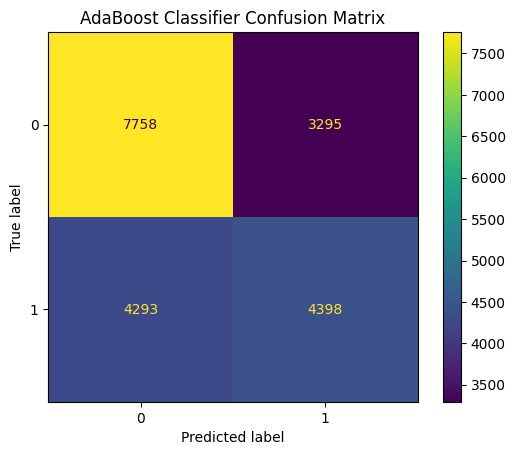

In [100]:
cm = ConfusionMatrixDisplay.from_estimator(Model_ada, X_test, y_test);
cm.ax_.set_title('AdaBoost Classifier Confusion Matrix')
plt.grid(False)

<b>MLP Classifier</b>

In [101]:
mlp = make_pipeline(MLPClassifier(random_state=1))
params = [{'mlpclassifier__activation':['identity', 'logistic', 'tanh', 'relu']}]

In [102]:
Model_mlp = GridSearchCV(mlp,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mlpclassifier',
                                        MLPClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'mlpclassifier__activation': ['identity', 'logistic',
                                                        'tanh', 'relu']}],
             verbose=1)

In [103]:
print("Model Best Score: ", Model_mlp.best_score_)
print("Model Best Params: ", Model_mlp.best_params_)

Model Best Score:  0.638505856283634
Model Best Params:  {'mlpclassifier__activation': 'relu'}


In [104]:
train_pred_mlp=Model_mlp.predict(X_train)
train_accuracy_score_mlp = accuracy_score(y_train,train_pred_mlp)

test_pred_mlp=Model_mlp.predict(X_test)
test_accuracy_score_mlp = accuracy_score(y_test,test_pred_mlp)
print('MLPClassifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_mlp)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_mlp)

MLPClassifier
Accuracy for Training set using accuracy score is
64.67869578980691
----------------------------------
Accuracy for Testing set using accuracy score is
63.61426256077796


Text(0.5, 1.0, 'MLPClassifier Confusion Matrix')

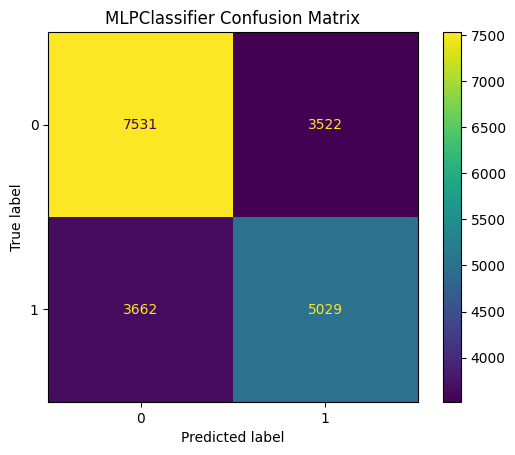

In [105]:
cm = ConfusionMatrixDisplay.from_estimator(Model_mlp, X_test, y_test);
cm.ax_.set_title('MLPClassifier Confusion Matrix')
plt.grid(False)

<b>K-Neighbors Classifier</b>

In [106]:
kn = make_pipeline(KNeighborsClassifier())
params = [{'kneighborsclassifier__n_neighbors':range(25,125,25), 'kneighborsclassifier__weights':['uniform', 'distance']}]

In [107]:
Model_kn = GridSearchCV(kn,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_kn.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'kneighborsclassifier__n_neighbors': range(25, 125, 25),
                          'kneighborsclassifier__weights': ['uniform',
                                                            'distance']}],
             verbose=1)

In [108]:
print("Model Best Score: ", Model_kn.best_score_)
print("Model Best Params: ", Model_kn.best_params_)

Model Best Score:  0.8315416270971827
Model Best Params:  {'kneighborsclassifier__n_neighbors': 100, 'kneighborsclassifier__weights': 'distance'}


In [109]:
train_pred_kn=Model_kn.predict(X_train)
train_accuracy_score_kn = accuracy_score(y_train,train_pred_kn)

test_pred_kn=Model_kn.predict(X_test)
test_accuracy_score_kn = accuracy_score(y_test,test_pred_kn)

print('KNeighbors Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_kn)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_kn)

KNeighbors Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
82.71880064829821


Text(0.5, 1.0, 'KNeighbors Classifier Confusion Matrix')

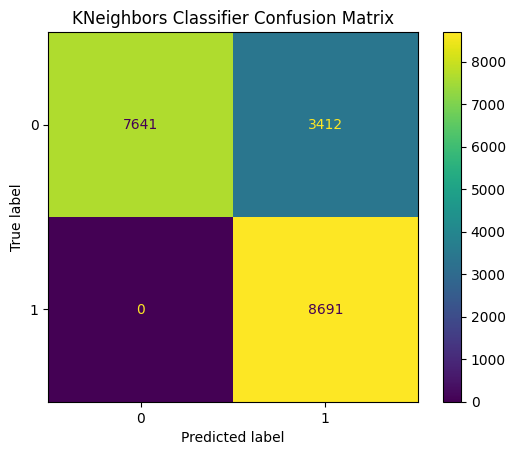

In [110]:
cm = ConfusionMatrixDisplay.from_estimator(Model_kn, X_test, y_test);
cm.ax_.set_title('KNeighbors Classifier Confusion Matrix')
plt.grid(False)

<b>Logistic Regression</b>

In [111]:
lr = make_pipeline(LogisticRegression(random_state=1))
params = [{}]

In [112]:
Model_lr = GridSearchCV(lr,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_lr.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logisticregression',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1, param_grid=[{}], verbose=1)

In [113]:
print("Model Best Score: ", Model_lr.best_score_)
print("Model Best Params: ", Model_lr.best_params_)

Model Best Score:  0.5833744855967078
Model Best Params:  {}


In [114]:
train_pred_lr=Model_lr.predict(X_train)
train_accuracy_score_lr = accuracy_score(y_train,train_pred_lr)

test_pred_lr=Model_lr.predict(X_test)
test_accuracy_score_lr = accuracy_score(y_test,test_pred_lr)

print('Logistic Regression')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_lr)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_lr)

Logistic Regression
Accuracy for Training set using accuracy score is
58.40582462804685
----------------------------------
Accuracy for Testing set using accuracy score is
58.61527552674231


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

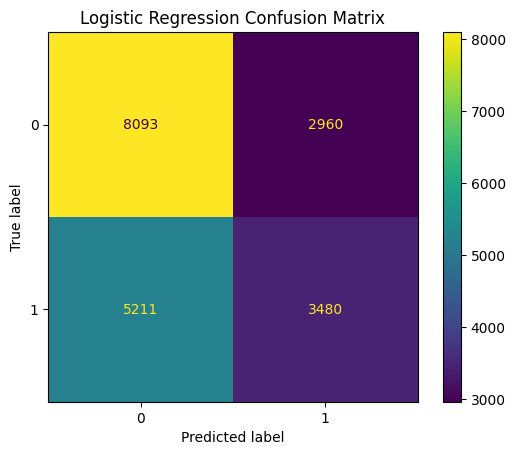

In [115]:
cm = ConfusionMatrixDisplay.from_estimator(Model_lr, X_test, y_test);
cm.ax_.set_title('Logistic Regression Confusion Matrix')
plt.grid(False)

<b>Gaussian Naive Bayes</b>

In [116]:
gnb = make_pipeline(GaussianNB())
params = [{}]

In [117]:
Model_gnb = GridSearchCV(gnb,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_gnb.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('gaussiannb', GaussianNB())]),
             n_jobs=-1, param_grid=[{}], verbose=1)

In [118]:
print("Model Best Score: ", Model_gnb.best_score_)
print("Model Best Params: ", Model_gnb.best_params_)

Model Best Score:  0.5792465970243749
Model Best Params:  {}


In [119]:
train_pred_gnb=Model_gnb.predict(X_train)
train_accuracy_score_gnb = accuracy_score(y_train,train_pred_gnb)

test_pred_gnb=Model_gnb.predict(X_test)
test_accuracy_score_gnb = accuracy_score(y_test,test_pred_gnb)

print('Gaussian Naive Bayes Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_gnb)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_gnb)

Gaussian Naive Bayes Classifier
Accuracy for Training set using accuracy score is
57.971509971509974
----------------------------------
Accuracy for Testing set using accuracy score is
57.90619935170178


Text(0.5, 1.0, 'Gaussian Naive Bayes Confusion Matrix')

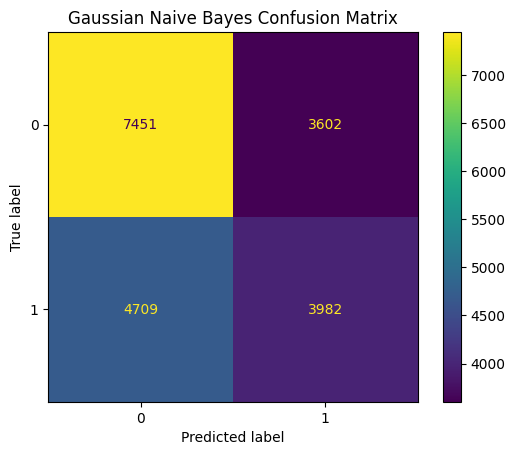

In [120]:
cm = ConfusionMatrixDisplay.from_estimator(Model_gnb, X_test, y_test);
cm.ax_.set_title('Gaussian Naive Bayes Confusion Matrix')
plt.grid(False)


<b>SVM</b>

In [121]:
Model_svm = SVC()
Model_svm.fit(X_train, y_train)

SVC()

In [122]:
train_pred_svm=Model_svm.predict(X_train)
train_accuracy_score_svm = accuracy_score(y_train,train_pred_svm)

test_pred_svm=Model_svm.predict(X_test)
test_accuracy_score_svm = accuracy_score(y_test,test_pred_svm)

print('SVM')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_svm)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_svm)

SVM
Accuracy for Training set using accuracy score is
61.3738524849636
----------------------------------
Accuracy for Testing set using accuracy score is
60.95016207455429


Text(0.5, 1.0, 'SVM Confusion Matrix')

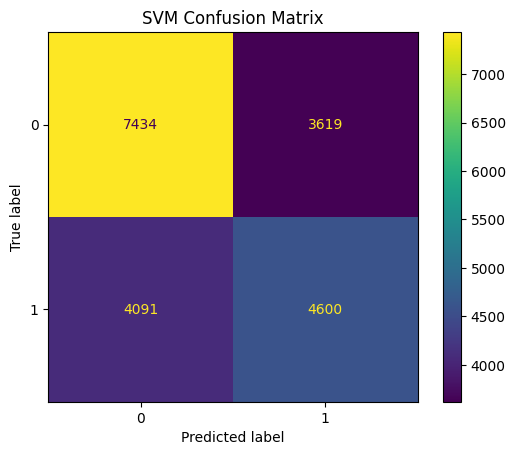

In [123]:
cm = ConfusionMatrixDisplay.from_estimator(Model_svm, X_test, y_test);
cm.ax_.set_title('SVM Confusion Matrix')
plt.grid(False)

<b>Voting Classifier</b>

In [124]:
list_model_name = ['Random Forest Classifer', 'Decision Tree Classifier', 'Extra Tree Classifier', 
                    'Gradient Boosting Classifier', 'XGB Classifier', 'LGBM Classifier', 'AdaBoost Classifier',
                    'MLP Classifier', 'KNeighbors Classifier', 'Logistic Regression', 'Gaussian Naive Bayes', 'SVM']
list_model_score= [test_accuracy_score_rf, test_accuracy_score_dt, test_accuracy_score_et, 
                    test_accuracy_score_gb, test_accuracy_score_xgb, test_accuracy_score_lgb, 
                    test_accuracy_score_ada, test_accuracy_score_mlp, test_accuracy_score_kn, 
                    test_accuracy_score_lr, test_accuracy_score_gnb, test_accuracy_score_svm]
sorted(zip(list_model_score, list_model_name), reverse=True)[:3]

[(0.9941247974068071, 'Extra Tree Classifier'),
 (0.9868820907617504, 'Random Forest Classifer'),
 (0.9553788492706645, 'Decision Tree Classifier')]

In [125]:
vo = make_pipeline(VotingClassifier(estimators=[('et_classifier', Model_et), ('rf_classifier', Model_rf), ('dt_classifier', Model_dt)]))
params = [{'votingclassifier__voting':['hard', 'soft']}]

In [126]:
Model_vo = GridSearchCV(vo,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model_vo.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('votingclassifier',
                                        VotingClassifier(estimators=[('et_classifier',
                                                                      GridSearchCV(cv=5,
                                                                                   estimator=Pipeline(steps=[('extratreesclassifier',
                                                                                                              ExtraTreesClassifier(random_state=1))]),
                                                                                   n_jobs=-1,
                                                                                   param_grid=[{'extratreesclassifier__criterion': ['gini',
                                                                                                                                    'entropy',
                                                                                                                                    'log_loss'],
                                                                                                'extratreesclassifier__n_estimators': range(25...
                                                                      GridSearchCV(cv=5,
                                                                                   estimator=Pipeline(steps=[('decisiontreeclassifier',
                                                                                                              DecisionTreeClassifier(random_state=1))]),
                                                                                   n_jobs=-1,
                                                                                   param_grid=[{'decisiontreeclassifier__criterion': ['gini',
                                                                                                                                      'entropy',
                                                                                                                                      'log_loss'],
                                                                                                'decisiontreeclassifier__splitter': ['best',
                                                                                                                                     'random']}],
                                                                                   verbose=1))]))]),
             n_jobs=-1,
             param_grid=[{'votingclassifier__voting': ['hard', 'soft']}],
             verbose=1)

In [127]:
print("Model Best Score: ", Model_vo.best_score_)
print("Model Best Params: ", Model_vo.best_params_)

Model Best Score:  0.9875403608736942
Model Best Params:  {'votingclassifier__voting': 'hard'}


In [128]:
train_pred_vo=Model_vo.predict(X_train)
train_accuracy_score_vo = accuracy_score(y_train,train_pred_vo)

test_pred_vo=Model_vo.predict(X_test)
test_accuracy_score_vo = accuracy_score(y_test,test_pred_vo)

print('Voting Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_vo)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_vo)

Voting Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
99.15923824959482


Text(0.5, 1.0, 'Voting Classifier Confusion Matrix')

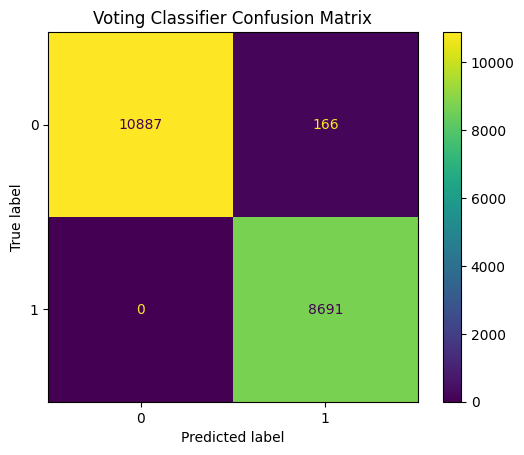

In [129]:
cm = ConfusionMatrixDisplay.from_estimator(Model_vo, X_test, y_test);
cm.ax_.set_title('Voting Classifier Confusion Matrix')
plt.grid(False)

##### <b>Model Evaluation</b>

In [130]:
list_model_name.append('Voting Classifier')
list_model_name

['Random Forest Classifer',
 'Decision Tree Classifier',
 'Extra Tree Classifier',
 'Gradient Boosting Classifier',
 'XGB Classifier',
 'LGBM Classifier',
 'AdaBoost Classifier',
 'MLP Classifier',
 'KNeighbors Classifier',
 'Logistic Regression',
 'Gaussian Naive Bayes',
 'SVM',
 'Voting Classifier']

In [131]:
list_model_score.append(test_accuracy_score_vo)
list_model_score

[0.9868820907617504,
 0.9553788492706645,
 0.9941247974068071,
 0.6316349270664505,
 0.7586102106969206,
 0.695097244732577,
 0.6156807131280388,
 0.6361426256077796,
 0.8271880064829822,
 0.586152755267423,
 0.5790619935170178,
 0.6095016207455429,
 0.9915923824959482]

In [132]:
list_model_pred = [test_pred_rf, test_pred_dt, test_pred_et, test_pred_gb, test_pred_xgb,
                    test_pred_lgb, test_pred_ada, test_pred_mlp, test_pred_kn,
                    test_pred_lr, test_pred_gnb, test_pred_svm, test_pred_vo
                    ]
list_model_pred

[array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64)]

Sort model yang digunakan berdasarkan accuracy score nya

In [133]:
sorted_list_model = sorted(zip(list_model_score, list_model_name, list_model_pred,), reverse=True)
sorted_list_model

[(0.9941247974068071,
  'Extra Tree Classifier',
  array([1, 0, 1, ..., 1, 1, 1], dtype=int64)),
 (0.9915923824959482,
  'Voting Classifier',
  array([1, 0, 1, ..., 1, 1, 1], dtype=int64)),
 (0.9868820907617504,
  'Random Forest Classifer',
  array([1, 0, 1, ..., 1, 1, 1], dtype=int64)),
 (0.9553788492706645,
  'Decision Tree Classifier',
  array([1, 0, 1, ..., 1, 1, 1], dtype=int64)),
 (0.8271880064829822,
  'KNeighbors Classifier',
  array([1, 0, 1, ..., 1, 1, 1], dtype=int64)),
 (0.7586102106969206, 'XGB Classifier', array([1, 1, 1, ..., 1, 1, 1])),
 (0.695097244732577,
  'LGBM Classifier',
  array([1, 1, 1, ..., 1, 1, 1], dtype=int64)),
 (0.6361426256077796,
  'MLP Classifier',
  array([1, 1, 0, ..., 1, 0, 1], dtype=int64)),
 (0.6316349270664505,
  'Gradient Boosting Classifier',
  array([0, 1, 0, ..., 0, 0, 1], dtype=int64)),
 (0.6156807131280388,
  'AdaBoost Classifier',
  array([0, 1, 0, ..., 0, 0, 0], dtype=int64)),
 (0.6095016207455429, 'SVM', array([0, 1, 0, ..., 0, 0, 0], dt

In [134]:
sorted_list_model_name = [row[1] for row in sorted_list_model]
sorted_list_model_name

['Extra Tree Classifier',
 'Voting Classifier',
 'Random Forest Classifer',
 'Decision Tree Classifier',
 'KNeighbors Classifier',
 'XGB Classifier',
 'LGBM Classifier',
 'MLP Classifier',
 'Gradient Boosting Classifier',
 'AdaBoost Classifier',
 'SVM',
 'Logistic Regression',
 'Gaussian Naive Bayes']

In [135]:
sorted_list_model_pred = [row[2] for row in sorted_list_model]
sorted_list_model_pred

[array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64)]

In [136]:
sorted_list_f1_score = []
sorted_list_precision_score = []
sorted_list_recall_score = []

##### <b>Data Evaluation</b>

Model dilakukan evaluasi berdasarkan nilai accuracy_score

<b>Accuracy Score</b>

In [137]:
for i in range(len(sorted_list_model)):
  print('Accuracy score dari model', sorted_list_model_name[i], 'adalah', accuracy_score(y_test,sorted_list_model_pred[i]))
  print('-------------------------------------------------------------------------------')

Accuracy score dari model Extra Tree Classifier adalah 0.9941247974068071
-------------------------------------------------------------------------------
Accuracy score dari model Voting Classifier adalah 0.9915923824959482
-------------------------------------------------------------------------------
Accuracy score dari model Random Forest Classifer adalah 0.9868820907617504
-------------------------------------------------------------------------------
Accuracy score dari model Decision Tree Classifier adalah 0.9553788492706645
-------------------------------------------------------------------------------
Accuracy score dari model KNeighbors Classifier adalah 0.8271880064829822
-------------------------------------------------------------------------------
Accuracy score dari model XGB Classifier adalah 0.7586102106969206
-------------------------------------------------------------------------------
Accuracy score dari model LGBM Classifier adalah 0.695097244732577
---------------

<b>F1 Score Score</b>

In [138]:
for i in range(len(sorted_list_model)):
  sorted_list_f1_score.append(f1_score(y_test,sorted_list_model_pred[i]))
  print('F1 Score dari model', sorted_list_model_name[i], 'adalah', sorted_list_f1_score[i])
  print('-------------------------------------------------------------------------------')

F1 Score dari model Extra Tree Classifier adalah 0.9933706709338209
-------------------------------------------------------------------------------
F1 Score dari model Voting Classifier adalah 0.9905402325051288
-------------------------------------------------------------------------------
F1 Score dari model Random Forest Classifer adalah 0.9853182926137974
-------------------------------------------------------------------------------
F1 Score dari model Decision Tree Classifier adalah 0.9517603898592784
-------------------------------------------------------------------------------
F1 Score dari model KNeighbors Classifier adalah 0.8359142060209676
-------------------------------------------------------------------------------
F1 Score dari model XGB Classifier adalah 0.731220392510715
-------------------------------------------------------------------------------
F1 Score dari model LGBM Classifier adalah 0.6613411341134113
---------------------------------------------------------

<b>Precision Score</b>

In [139]:
for i in range(len(sorted_list_model)):
  sorted_list_precision_score.append(precision_score(y_test,sorted_list_model_pred[i]))
  print('Precision score dari model', sorted_list_model_name[i], 'adalah', sorted_list_precision_score[i])
  print('-------------------------------------------------------------------------------')

Precision score dari model Extra Tree Classifier adalah 0.9868286590212331
-------------------------------------------------------------------------------
Precision score dari model Voting Classifier adalah 0.9812577622219714
-------------------------------------------------------------------------------
Precision score dari model Random Forest Classifer adalah 0.9710614525139665
-------------------------------------------------------------------------------
Precision score dari model Decision Tree Classifier adalah 0.907960718763059
-------------------------------------------------------------------------------
Precision score dari model KNeighbors Classifier adalah 0.7180864248533422
-------------------------------------------------------------------------------
Precision score dari model XGB Classifier adalah 0.717066696161929
-------------------------------------------------------------------------------
Precision score dari model LGBM Classifier adalah 0.6470005503577325
---------

<b>Recall Score</b>

In [140]:
for i in range(len(sorted_list_model)):
  sorted_list_recall_score.append(recall_score(y_test,sorted_list_model_pred[i]))
  print('Recall score dari model', sorted_list_model_name[i], 'adalah', sorted_list_recall_score[i])
  print('-------------------------------------------------------------------------------')

Recall score dari model Extra Tree Classifier adalah 1.0
-------------------------------------------------------------------------------
Recall score dari model Voting Classifier adalah 1.0
-------------------------------------------------------------------------------
Recall score dari model Random Forest Classifer adalah 1.0
-------------------------------------------------------------------------------
Recall score dari model Decision Tree Classifier adalah 1.0
-------------------------------------------------------------------------------
Recall score dari model KNeighbors Classifier adalah 1.0
-------------------------------------------------------------------------------
Recall score dari model XGB Classifier adalah 0.7459440800828443
-------------------------------------------------------------------------------
Recall score dari model LGBM Classifier adalah 0.6763318375330802
-------------------------------------------------------------------------------
Recall score dari model

<b>Classification Report</b>

In [141]:

for i in range(len(sorted_list_model)):
  print('-------------------------------------------------------------------------------')
  print('Classification Report dari model', sorted_list_model_name[i], 'adalah sebagai berikut')
  print('-------------------------------------------------------------------------------')
  print(classification_report(y_test, sorted_list_model_pred[i]))

-------------------------------------------------------------------------------
Classification Report dari model Extra Tree Classifier adalah sebagai berikut
-------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11053
           1       0.99      1.00      0.99      8691

    accuracy                           0.99     19744
   macro avg       0.99      0.99      0.99     19744
weighted avg       0.99      0.99      0.99     19744

-------------------------------------------------------------------------------
Classification Report dari model Voting Classifier adalah sebagai berikut
-------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11053
           1       0.98      1.00      0.99      8691

    accuracy                         

In [142]:
sorted_pd = pd.DataFrame(sorted_list_model)

In [143]:
sorted_pd['f1_score'] = sorted_list_f1_score
sorted_pd['precision_score'] = sorted_list_precision_score
sorted_pd['recall_score'] = sorted_list_recall_score

<b>Visualisasi Perbandingan Nilai Accuracy Score pada Setiap Model</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Extra Tree Classifier'),
  Text(1, 0, 'Voting Classifier'),
  Text(2, 0, 'Random Forest Classifer'),
  Text(3, 0, 'Decision Tree Classifier'),
  Text(4, 0, 'KNeighbors Classifier'),
  Text(5, 0, 'XGB Classifier'),
  Text(6, 0, 'LGBM Classifier'),
  Text(7, 0, 'MLP Classifier'),
  Text(8, 0, 'Gradient Boosting Classifier'),
  Text(9, 0, 'AdaBoost Classifier'),
  Text(10, 0, 'SVM'),
  Text(11, 0, 'Logistic Regression'),
  Text(12, 0, 'Gaussian Naive Bayes')])

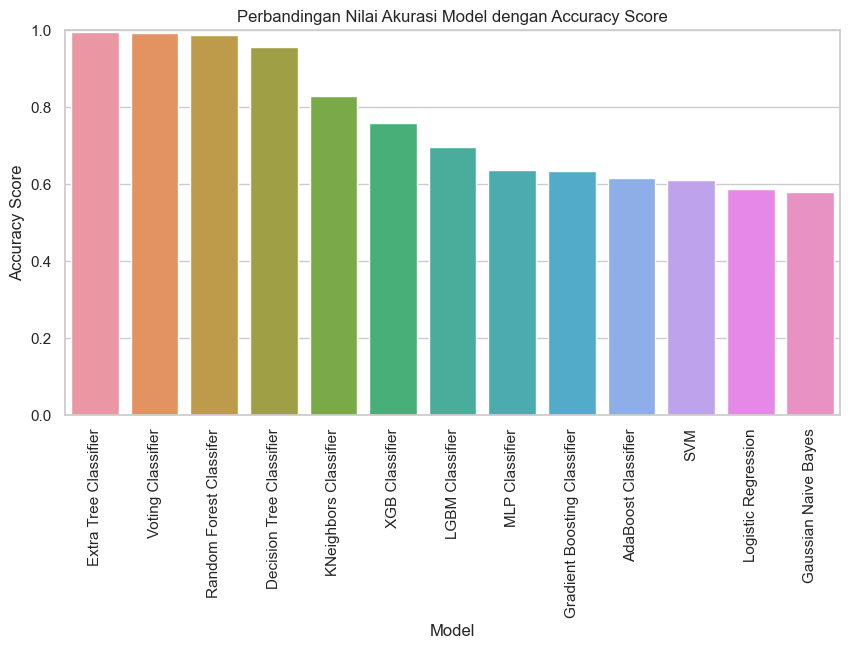

In [144]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=1, y=0, data=sorted_pd)
ax.set(ylim=(0, 1))
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Perbandingan Nilai Akurasi Model dengan Accuracy Score')
plt.xticks(rotation=90)

<b>Visualisasi Perbandingan Nilai F1 Score pada Setiap Model</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Extra Tree Classifier'),
  Text(1, 0, 'Voting Classifier'),
  Text(2, 0, 'Random Forest Classifer'),
  Text(3, 0, 'Decision Tree Classifier'),
  Text(4, 0, 'KNeighbors Classifier'),
  Text(5, 0, 'XGB Classifier'),
  Text(6, 0, 'LGBM Classifier'),
  Text(7, 0, 'MLP Classifier'),
  Text(8, 0, 'Gradient Boosting Classifier'),
  Text(9, 0, 'AdaBoost Classifier'),
  Text(10, 0, 'SVM'),
  Text(11, 0, 'Logistic Regression'),
  Text(12, 0, 'Gaussian Naive Bayes')])

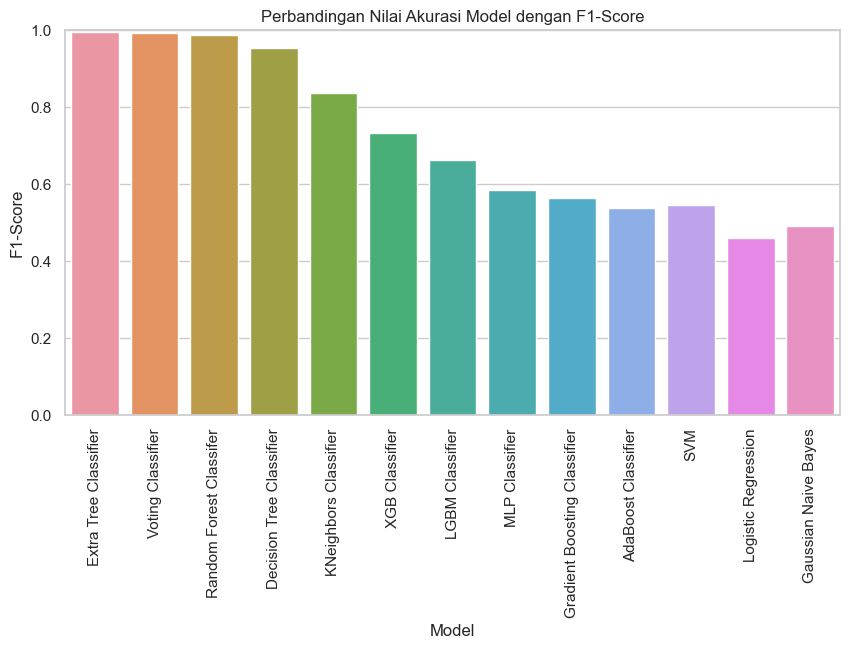

In [145]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=1, y='f1_score', data=sorted_pd)
ax.set(ylim=(0, 1))
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Perbandingan Nilai Akurasi Model dengan F1-Score')
plt.xticks(rotation=90)

<b>Visualisasi Perbandingan Nilai Precision Score pada Setiap Model</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Extra Tree Classifier'),
  Text(1, 0, 'Voting Classifier'),
  Text(2, 0, 'Random Forest Classifer'),
  Text(3, 0, 'Decision Tree Classifier'),
  Text(4, 0, 'KNeighbors Classifier'),
  Text(5, 0, 'XGB Classifier'),
  Text(6, 0, 'LGBM Classifier'),
  Text(7, 0, 'MLP Classifier'),
  Text(8, 0, 'Gradient Boosting Classifier'),
  Text(9, 0, 'AdaBoost Classifier'),
  Text(10, 0, 'SVM'),
  Text(11, 0, 'Logistic Regression'),
  Text(12, 0, 'Gaussian Naive Bayes')])

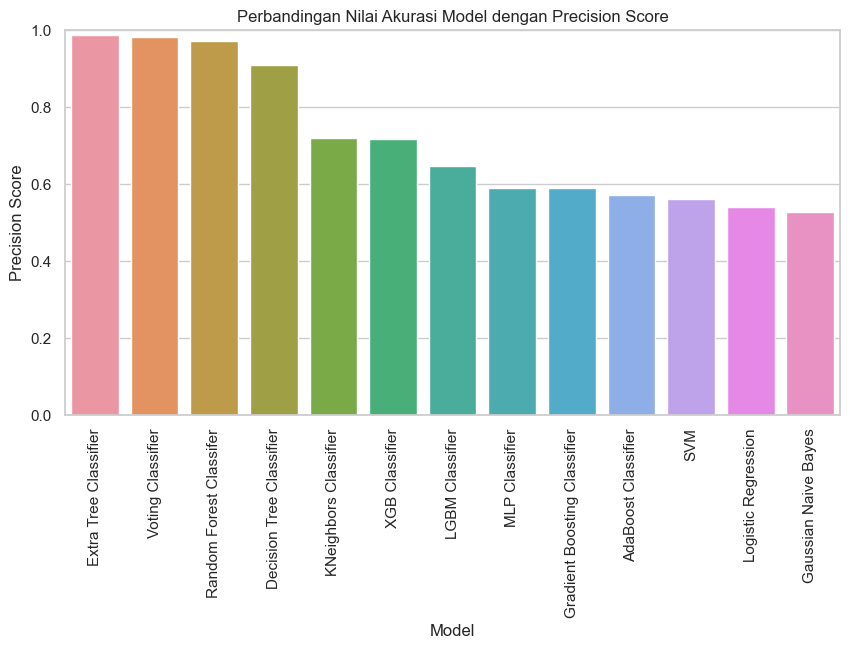

In [146]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=1, y='precision_score', data=sorted_pd)
ax.set(ylim=(0, 1))
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Perbandingan Nilai Akurasi Model dengan Precision Score')
plt.xticks(rotation=90)

<b>Visualisasi Perbandingan Nilai Recall Score pada Setiap Model</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Extra Tree Classifier'),
  Text(1, 0, 'Voting Classifier'),
  Text(2, 0, 'Random Forest Classifer'),
  Text(3, 0, 'Decision Tree Classifier'),
  Text(4, 0, 'KNeighbors Classifier'),
  Text(5, 0, 'XGB Classifier'),
  Text(6, 0, 'LGBM Classifier'),
  Text(7, 0, 'MLP Classifier'),
  Text(8, 0, 'Gradient Boosting Classifier'),
  Text(9, 0, 'AdaBoost Classifier'),
  Text(10, 0, 'SVM'),
  Text(11, 0, 'Logistic Regression'),
  Text(12, 0, 'Gaussian Naive Bayes')])

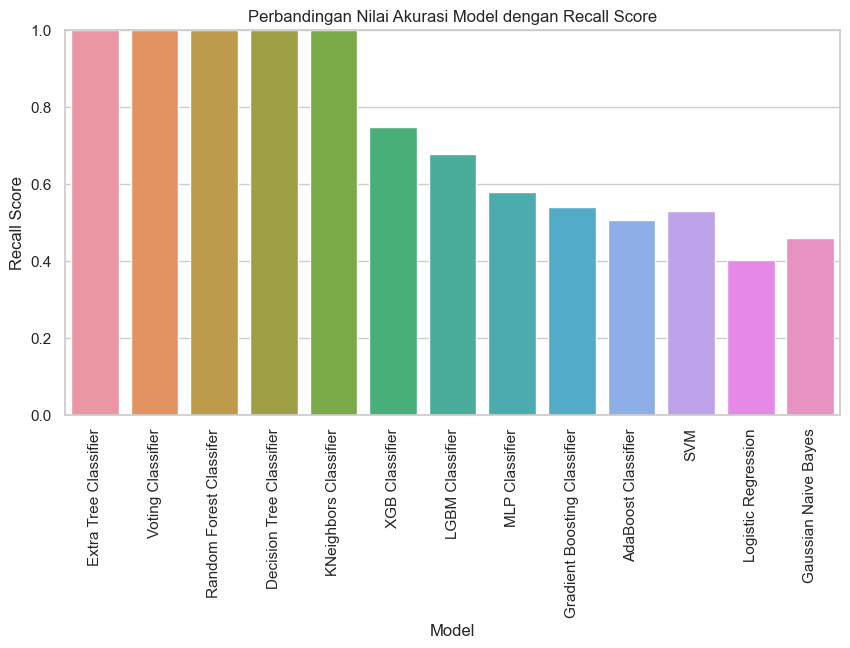

In [147]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=1, y='recall_score', data=sorted_pd)
ax.set(ylim=(0, 1))
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Perbandingan Nilai Akurasi Model dengan Recall Score')
plt.xticks(rotation=90)

##### <b>Kesimpulan</b>

Berdasarkan evaluasi, model yang paling akurat adalah model yang menggunakan Extra Trees Classifier. Berikut adalah hasil yang diperoleh menggunakan Model Extra Trees Classifier

In [148]:
train_pred_et=Model_et.predict(X_train)
train_accuracy_score_et = accuracy_score(y_train, train_pred_et)
train_f1_score_et = f1_score(y_train, train_pred_et)
train_precision_score_et = precision_score(y_train, train_pred_et)
train_recall_score_et = recall_score(y_train, train_pred_et)

test_pred_et=Model_et.predict(X_test)
test_accuracy_score_et = accuracy_score(y_test, test_pred_et)
test_f1_score_et = f1_score(y_test, test_pred_et)
test_precision_score_et = precision_score(y_test, test_pred_et)
test_recall_score_et = recall_score(y_test, test_pred_et)

print('Extra Trees Classifier Accuracy')
print('Accuracy for Training set using Accuracy Score is')
print( 100 * train_accuracy_score_et)
print('Extra Trees Classifier')
print('Accuracy for Training set using F1-Score is')
print( 100 * train_f1_score_et)
print('Extra Trees Classifier')
print('Accuracy for Training set using Precision Score is')
print( 100 * train_precision_score_et)
print('Extra Trees Classifier')
print('Accuracy for Training set using Recall score is')
print( 100 * train_recall_score_et)
print('----------------------------------------------------------')
print('----------------------------------------------------------')
print('Extra Trees Classifier')
print('Accuracy for Testing set using Accuracy Score is')
print( 100 * test_accuracy_score_et)
print('Extra Trees Classifier')
print('Accuracy for Testing set using F1-Score is')
print( 100 * test_f1_score_et)
print('Extra Trees Classifier')
print('Accuracy for Testing set using Precision Score is')
print( 100 * test_precision_score_et)
print('Extra Trees Classifier')
print('Accuracy for Testing set using Recall score is')
print( 100 * test_recall_score_et)

Extra Trees Classifier Accuracy
Accuracy for Training set using Accuracy Score is
100.0
Extra Trees Classifier
Accuracy for Training set using F1-Score is
100.0
Extra Trees Classifier
Accuracy for Training set using Precision Score is
100.0
Extra Trees Classifier
Accuracy for Training set using Recall score is
100.0
----------------------------------------------------------
----------------------------------------------------------
Extra Trees Classifier
Accuracy for Testing set using Accuracy Score is
99.41247974068071
Extra Trees Classifier
Accuracy for Testing set using F1-Score is
99.33706709338209
Extra Trees Classifier
Accuracy for Testing set using Precision Score is
98.68286590212331
Extra Trees Classifier
Accuracy for Testing set using Recall score is
100.0


Berikut adalah Classification Report dengan Model Extra Trees Classifier

In [152]:
print('Extra Trees Classifier Classification Report')
print('----------------------------------------------------------')
print(classification_report(y_test, test_pred_et))

Extra Trees Classifier Classification Report
----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11053
           1       0.99      1.00      0.99      8691

    accuracy                           0.99     19744
   macro avg       0.99      0.99      0.99     19744
weighted avg       0.99      0.99      0.99     19744



Berikut adalah Confusion Matrix dengan Model Extra Trees Classifier

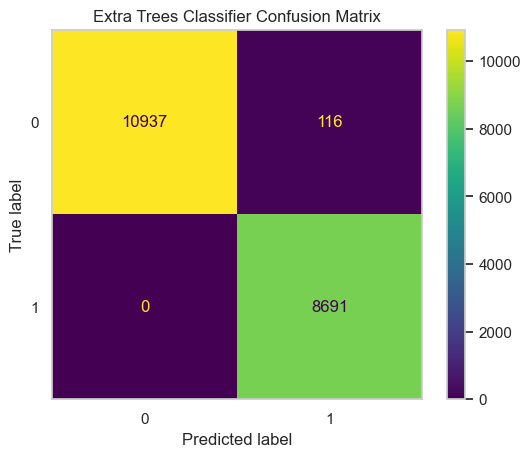

In [159]:
cm = ConfusionMatrixDisplay.from_estimator(Model_et, X_test, y_test);
cm.ax_.set_title('Extra Trees Classifier Confusion Matrix')
plt.grid(False)

##### <b>Submission File untuk test.csv</b>

In [154]:
submission_test =  Model_et.predict(test_preprocessed)
submission = pd.DataFrame()
submission['policy_id'] = test_policy_id
submission['is_claim'] = submission_test
submission.to_csv('submission.csv', index=None)

##### <b>Skenario Pengujian 2 : Tanpa Cross Validation (GridSearchCV)</b>

In [294]:
train_cpy.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0


In [295]:
X_2 = X
X_2

,policy_tenure,age_of_car,age_of_policyholder,population_density,max_torque,max_power,is_adjustable_steering,cylinder,is_front_fog_lights,is_brake_assist,is_driver_seat_height_adjustable
0,0.515874,0.05,0.644231,4990,5,2,0,3,0,0,0
1,0.672619,0.02,0.375000,27003,5,2,0,3,0,0,0
2,0.841110,0.02,0.384615,4076,5,2,0,3,0,0,0
3,0.900277,0.11,0.432692,21622,0,6,1,4,1,1,1
4,0.596403,0.11,0.634615,34738,8,5,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,8,5,0,3,0,0,0
58588,1.199642,0.02,0.519231,7788,5,2,0,3,0,0,0
58589,1.162273,0.05,0.451923,34738,5,2,0,3,0,0,0
58590,1.236307,0.14,0.557692,8794,0,6,1,4,1,1,1


In [296]:
y_2 = y
y_2

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

In [297]:
print("Shape dari data X", X_2.shape)
print("Shape dari data Y", y_2.shape)

Shape dari data X (58592, 11)
Shape dari data Y (58592,)


In [298]:
os =  RandomOverSampler(random_state=42, sampling_strategy=0.8)
X_res_2, y_res_2 = os.fit_resample(X_2, y_2)
X_res_2.shape, y_res_2.shape

((98719, 11), (98719,))

In [299]:
scaler=StandardScaler()
X_res_2=scaler.fit_transform(X_res_2)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res_2)))

Original dataset shape Counter({0: 54844, 1: 3748})
Resampled dataset shape Counter({0: 54844, 1: 43875})


In [300]:
X_res_2

array([[-0.35516826, -0.30571442,  1.37365366, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       [ 0.02784549, -0.84872532, -0.79355603, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       [ 0.43956315, -0.84872532, -0.71615568, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       ...,
       [ 0.90584623,  0.23729648, -0.56135499, ...,  0.83769265,
         0.8906884 ,  0.82828932],
       [ 0.83434809,  1.14231464, -0.63875534, ..., -1.19375525,
        -1.1227271 , -1.20730761],
       [-0.21942201, -0.30571442,  0.36744916, ...,  0.83769265,
         0.8906884 ,  0.82828932]])

In [301]:
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X_res_2,y_res_2,test_size = 0.2, random_state = 1)
print('Data train : ', X_train.shape, y_train.shape)
print('Data test : ', X_test.shape, y_test.shape)

Data train :  (78975, 11) (78975,)
Data test :  (19744, 11) (19744,)


In [302]:
Model_et_2 = ExtraTreesClassifier(random_state=1)
Model_et_2.fit(X_train_2, y_train_2)

ExtraTreesClassifier(random_state=1)

In [303]:
train_pred_2=Model_et_2.predict(X_train_2)
train_accuracy_score_2 = accuracy_score(y_train_2,train_pred_2)

test_pred_2=Model_et_2.predict(X_test_2)
test_accuracy_score_2 = accuracy_score(y_test_2,test_pred_2)

print('Extra Trees Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_2)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_2)

Extra Trees Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
99.41247974068071


In [304]:
print('Dengan GridSearchCV : ', test_accuracy_score_et)
print('Tanpa GridSearchCV : ', test_accuracy_score_2)

Dengan GridSearchCV :  0.9941247974068071
Tanpa GridSearchCV :  0.9941247974068071


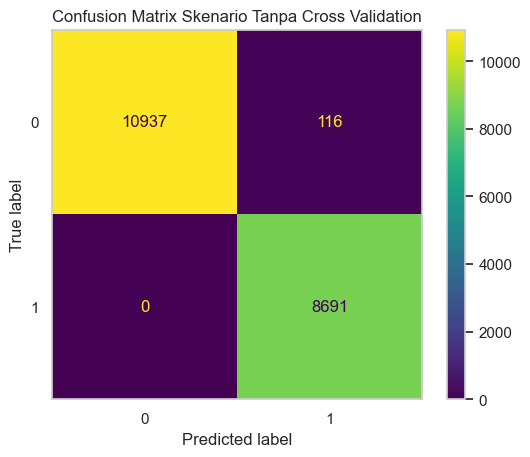

In [305]:
cm_skenario_2 = ConfusionMatrixDisplay.from_estimator(Model_et_2, X_test_2, y_test_2);
cm_skenario_2.ax_.set_title('Confusion Matrix Skenario Tanpa Cross Validation')
plt.grid(False)

##### <b>Skenario Pengujian 3 : Tanpa Seleksi Fitur</b>

In [306]:
X_3 = train_cpy.drop(columns="is_claim")
X_3

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,1,2
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,0,0,1,1,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,20,8794,2,0,4,2,8,...,0,0,1,1,1,0,1,1,1,2
58588,1.199642,0.02,0.519231,5,7788,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
58589,1.162273,0.05,0.451923,17,34738,1,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
58590,1.236307,0.14,0.557692,20,8794,1,2,7,2,0,...,0,1,1,1,1,1,1,1,1,2


In [307]:
y_3 = train_cpy["is_claim"]
y_3

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

In [308]:
print("Shape dari data X", X_3.shape)
print("Shape dari data Y", y_3.shape)

Shape dari data X (58592, 42)
Shape dari data Y (58592,)


In [309]:
os =  RandomOverSampler(random_state=42, sampling_strategy=0.8)
X_res_3, y_res_3 = os.fit_resample(X_3, y_3)
X_res_3.shape, y_res_3.shape

((98719, 42), (98719,))

In [310]:
scaler=StandardScaler()
X_res_3=scaler.fit_transform(X_res_3)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res_3)))

Original dataset shape Counter({0: 54844, 1: 3748})
Resampled dataset shape Counter({0: 54844, 1: 43875})


In [311]:
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(X_res_3,y_res_3,test_size = 0.2, random_state = 1)
print('Data train : ', X_train.shape, y_train.shape)
print('Data test : ', X_test.shape, y_test.shape)

Data train :  (78975, 11) (78975,)
Data test :  (19744, 11) (19744,)


In [312]:
Model_et_3 = Model_et
Model_et_3.fit(X_train_3, y_train_3)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'extratreesclassifier__criterion': ['gini', 'entropy',
                                                              'log_loss'],
                          'extratreesclassifier__n_estimators': range(25, 125, 25)}],
             verbose=1)

In [313]:
print("Model Best Score: ", Model_et_3.best_score_)
print("Model Best Params: ", Model_et_3.best_params_)

Model Best Score:  0.9891864514086736
Model Best Params:  {'extratreesclassifier__criterion': 'entropy', 'extratreesclassifier__n_estimators': 100}


In [314]:
train_pred_3=Model_et_3.predict(X_train_3)
train_accuracy_score_3 = accuracy_score(y_train_3,train_pred_3)

test_pred_3=Model_et_3.predict(X_test_3)
test_accuracy_score_3 = accuracy_score(y_test_3,test_pred_3)

print('Extra Trees Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_3)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_3)

Extra Trees Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
99.2959886547812


In [315]:
print('Dengan Seleksi Fitur', test_accuracy_score_et)
print('Tanpa Seleksi Fitur', test_accuracy_score_3)

Dengan Seleksi Fitur 0.9941247974068071
Tanpa Seleksi Fitur 0.992959886547812


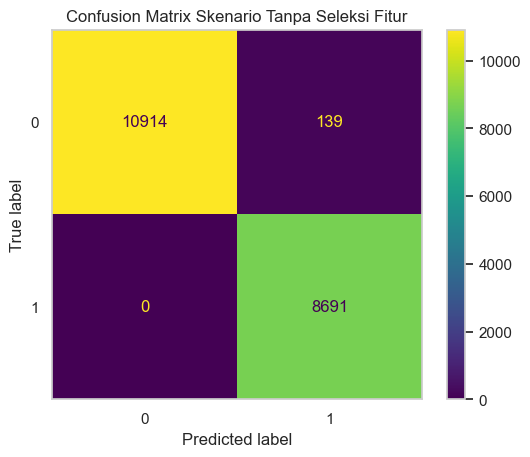

In [316]:
cm_skenario_3 = ConfusionMatrixDisplay.from_estimator(Model_et_3, X_test_3, y_test_3);
cm_skenario_3.ax_.set_title('Confusion Matrix Skenario Tanpa Seleksi Fitur')
plt.grid(False)

##### <b>Skenario Pengujian 4: Tanpa Oversampling</b>

In [317]:
X

,policy_tenure,age_of_car,age_of_policyholder,population_density,max_torque,max_power,is_adjustable_steering,cylinder,is_front_fog_lights,is_brake_assist,is_driver_seat_height_adjustable
0,0.515874,0.05,0.644231,4990,5,2,0,3,0,0,0
1,0.672619,0.02,0.375000,27003,5,2,0,3,0,0,0
2,0.841110,0.02,0.384615,4076,5,2,0,3,0,0,0
3,0.900277,0.11,0.432692,21622,0,6,1,4,1,1,1
4,0.596403,0.11,0.634615,34738,8,5,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,8,5,0,3,0,0,0
58588,1.199642,0.02,0.519231,7788,5,2,0,3,0,0,0
58589,1.162273,0.05,0.451923,34738,5,2,0,3,0,0,0
58590,1.236307,0.14,0.557692,8794,0,6,1,4,1,1,1


In [318]:
y

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

In [319]:
X.shape, y.shape

((58592, 11), (58592,))

In [320]:
X_4 = X
y_4 = y

In [321]:
scaler=StandardScaler()
X_4=scaler.fit_transform(X_4)
print("Shape dari data X", X_4.shape)
print("Shape dari data Y", y_4.shape)

Shape dari data X (58592, 11)
Shape dari data Y (58592,)


In [322]:
X_train_4,X_test_4,y_train_4,y_test_4=train_test_split(X_4,y_4,test_size = 0.2, random_state = 1)
print('Data train : ', X_train_4.shape, y_train_4.shape)
print('Data test : ', X_test_4.shape, y_test_4.shape)

Data train :  (46873, 11) (46873,)
Data test :  (11719, 11) (11719,)


In [323]:
Model_et_4 = Model_et 
Model_et_4.fit(X_train_4, y_train_4)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'extratreesclassifier__criterion': ['gini', 'entropy',
                                                              'log_loss'],
                          'extratreesclassifier__n_estimators': range(25, 125, 25)}],
             verbose=1)

In [324]:
print("Model Best Score: ", Model_et_4.best_score_)
print("Model Best Params: ", Model_et_4.best_params_)

Model Best Score:  0.9284236239243298
Model Best Params:  {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 50}


In [325]:
train_pred_4=Model_et_4.predict(X_train_4)
train_accuracy_score_4 = accuracy_score(y_train_4,train_pred_4)

test_pred_4=Model_et_4.predict(X_test_4)
test_accuracy_score_4 = accuracy_score(y_test_4,test_pred_4)

print('Extra Trees Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_4)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_4)

Extra Trees Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
92.73828824985067


In [326]:
print('Dengan Oversampling : ', test_accuracy_score_et)
print('Tanpa Oversampling : ', test_accuracy_score_4)

Dengan Oversampling :  0.9941247974068071
Tanpa Oversampling :  0.9273828824985066


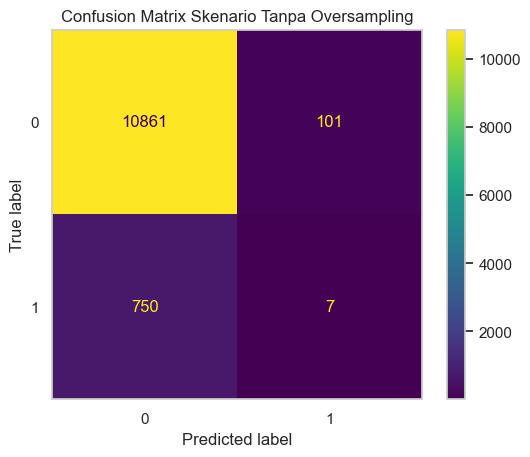

In [327]:
cm_skenario_4 = ConfusionMatrixDisplay.from_estimator(Model_et_4, X_test_4, y_test_4);
cm_skenario_4.ax_.set_title('Confusion Matrix Skenario Tanpa Oversampling')
plt.grid(False)

##### <b>Skenario Pengujian 5 : Dengan Normalisasi yang Berbeda</b>

In [328]:
X_5 = X_4
y_5 = y_4
X_5.shape, y_5.shape

((58592, 11), (58592,))

In [329]:
scaler_s=StandardScaler()
scaler_m=MinMaxScaler()
scaler_r=RobustScaler()
scaler_n=Normalizer()

X_5s=scaler_s.fit_transform(X_5)
X_5m=scaler_m.fit_transform(X_5)
X_5r=scaler_r.fit_transform(X_5)
X_5n=scaler_n.fit_transform(X_5)

print("Shape dari data X", X_5.shape)
print("Shape dari data Y", y_5.shape)

Shape dari data X (58592, 11)
Shape dari data Y (58592,)


In [330]:
X_5s

array([[-0.23028345, -0.34244685,  1.42255728, ..., -1.17286324,
        -1.10369092, -1.18789486],
       [ 0.14818765, -0.87135928, -0.7683621 , ..., -1.17286324,
        -1.10369092, -1.18789486],
       [ 0.55502223, -0.87135928, -0.69011498, ..., -1.17286324,
        -1.10369092, -1.18789486],
       ...,
       [ 1.33048996, -0.34244685, -0.14238513, ..., -1.17286324,
        -1.10369092, -1.18789486],
       [ 1.50925096,  1.24429045,  0.7183332 , ...,  0.85261433,
         0.90605077,  0.84182535],
       [-1.17545276, -0.87135928, -0.22063226, ...,  0.85261433,
         0.90605077,  0.84182535]])

In [331]:
X_5m

array([[0.36812984, 0.05      , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.48057999, 0.02      , 0.12162162, ..., 0.        , 0.        ,
        0.        ],
       [0.60145742, 0.02      , 0.13513514, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.83186197, 0.05      , 0.22972973, ..., 0.        , 0.        ,
        0.        ],
       [0.88497489, 0.14      , 0.37837838, ..., 1.        , 1.        ,
        1.        ],
       [0.08730407, 0.02      , 0.21621622, ..., 1.        , 1.        ,
        1.        ]])

In [332]:
X_5r

array([[-0.06987726, -0.11111111,  1.05263158, ..., -1.        ,
        -1.        , -1.        ],
       [ 0.11923301, -0.44444444, -0.42105263, ..., -1.        ,
        -1.        , -1.        ],
       [ 0.32251564, -0.44444444, -0.36842105, ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [ 0.70999281, -0.11111111,  0.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.79931414,  0.88888889,  0.57894737, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54214905, -0.44444444, -0.05263158, ...,  0.        ,
         0.        ,  0.        ]])

In [333]:
X_5n

array([[-0.07010928, -0.10425717,  0.43309437, ..., -0.35707558,
        -0.33601622, -0.36165193],
       [ 0.04790997, -0.28171575, -0.24841614, ..., -0.37919382,
        -0.35682999, -0.38405363],
       [ 0.17359523, -0.2725365 , -0.21584842, ..., -0.3668384 ,
        -0.34520326, -0.37153987],
       ...,
       [ 0.40673385, -0.10468679, -0.04352746, ..., -0.358547  ,
        -0.33740086, -0.3631422 ],
       [ 0.4535211 ,  0.37390201,  0.21585493, ...,  0.25620563,
         0.27226297,  0.2529636 ],
       [-0.42173058, -0.3126275 , -0.07915875, ...,  0.30590216,
         0.32507416,  0.30203127]])

In [334]:
os =  RandomOverSampler(random_state=42, sampling_strategy=0.8)
X_res_5s, y_res_5s = os.fit_resample(X_5s, y_5)
X_res_5m, y_res_5m = os.fit_resample(X_5m, y_5)
X_res_5r, y_res_5r = os.fit_resample(X_5r, y_5)
X_res_5n, y_res_5n = os.fit_resample(X_5n, y_5)

print(X_res_5s.shape, y_res_5s.shape)
print(X_res_5m.shape, y_res_5m.shape)
print(X_res_5r.shape, y_res_5r.shape)
print(X_res_5n.shape, y_res_5n.shape)

(98719, 11) (98719,)
(98719, 11) (98719,)
(98719, 11) (98719,)
(98719, 11) (98719,)


In [335]:
X_train_5s,X_test_5s,y_train_5s,y_test_5s=train_test_split(X_res_5s,y_res_5s,test_size = 0.2, random_state = 1)
print('Data train : ', X_train_5s.shape, y_train_5s.shape)
print('Data test : ', X_test_5s.shape, y_test_5s.shape)

Data train :  (78975, 11) (78975,)
Data test :  (19744, 11) (19744,)


In [336]:
X_train_5m,X_test_5m,y_train_5m,y_test_5m=train_test_split(X_res_5m,y_res_5m,test_size = 0.2, random_state = 1)
print('Data train : ', X_train_5m.shape, y_train_5m.shape)
print('Data test : ', X_test_5m.shape, y_test_5m.shape)

Data train :  (78975, 11) (78975,)
Data test :  (19744, 11) (19744,)


In [337]:
X_train_5r,X_test_5r,y_train_5r,y_test_5r=train_test_split(X_res_5r,y_res_5r,test_size = 0.2, random_state = 1)
print('Data train : ', X_train_5r.shape, y_train_5r.shape)
print('Data test : ', X_test_5r.shape, y_test_5r.shape)

Data train :  (78975, 11) (78975,)
Data test :  (19744, 11) (19744,)


In [338]:
X_train_5n,X_test_5n,y_train_5n,y_test_5n=train_test_split(X_res_5n,y_res_5n,test_size = 0.2, random_state = 1)
print('Data train : ', X_train_5n.shape, y_train_5n.shape)
print('Data test : ', X_test_5n.shape, y_test_5n.shape)

Data train :  (78975, 11) (78975,)
Data test :  (19744, 11) (19744,)


In [339]:
Model_et_5_Standard = Model_et 
Model_et_5_Standard.fit(X_train_5s, y_train_5s)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'extratreesclassifier__criterion': ['gini', 'entropy',
                                                              'log_loss'],
                          'extratreesclassifier__n_estimators': range(25, 125, 25)}],
             verbose=1)

In [340]:
print("Standard Scaler")
print("Model Best Score: ", Model_et_5_Standard.best_score_)
print("Model Best Params: ", Model_et_5_Standard.best_params_)
print("======================================================")

Standard Scaler
Model Best Score:  0.9911997467553023
Model Best Params:  {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 100}


In [341]:
train_pred_5s=Model_et_5_Standard.predict(X_train_5s)
train_accuracy_score_5s = accuracy_score(y_train_5s,train_pred_5s)
test_pred_5s=Model_et_5_Standard.predict(X_test_5s)
test_accuracy_score_5s = accuracy_score(y_test_5s,test_pred_5s)

print('Extra Trees Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_5s)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_5s)

Extra Trees Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
99.41247974068071


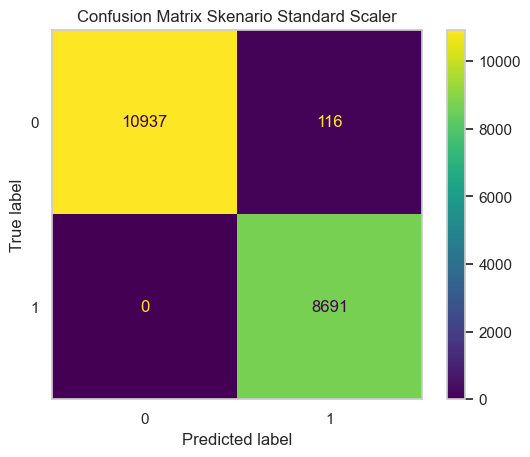

In [342]:
cm_skenario_5s = ConfusionMatrixDisplay.from_estimator(Model_et_5_Standard, X_test_5s, y_test_5s);
cm_skenario_5s.ax_.set_title('Confusion Matrix Skenario Standard Scaler')
plt.grid(False)

In [343]:
Model_et_5_MinMaX = Model_et 
Model_et_5_MinMaX.fit(X_train_5m, y_train_5m)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'extratreesclassifier__criterion': ['gini', 'entropy',
                                                              'log_loss'],
                          'extratreesclassifier__n_estimators': range(25, 125, 25)}],
             verbose=1)

In [344]:
print("MinMax Scaler")
print("Model Best Score: ", Model_et_5_MinMaX.best_score_)
print("Model Best Params: ", Model_et_5_MinMaX.best_params_)
print("======================================================")

MinMax Scaler
Model Best Score:  0.9911744222855333
Model Best Params:  {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 100}


In [345]:
train_pred_5m=Model_et_5_MinMaX.predict(X_train_5m)
train_accuracy_score_5m = accuracy_score(y_train_5m,train_pred_5m)
test_pred_5m=Model_et_5_MinMaX.predict(X_test_5m)
test_accuracy_score_5m = accuracy_score(y_test_5m,test_pred_5m)

print('Extra Trees Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_5m)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_5m)

Extra Trees Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
99.41754457050244


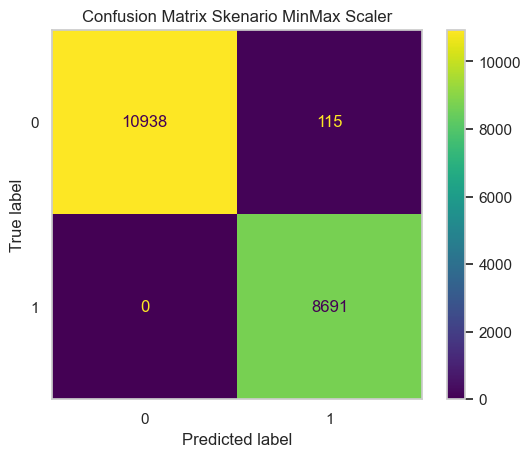

In [346]:
cm_skenario_5m = ConfusionMatrixDisplay.from_estimator(Model_et_5_MinMaX, X_test_5m, y_test_5m);
cm_skenario_5m.ax_.set_title('Confusion Matrix Skenario MinMax Scaler')
plt.grid(False)

In [347]:
Model_et_5_Robust = Model_et 
Model_et_5_Robust.fit(X_train_5r, y_train_5r)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'extratreesclassifier__criterion': ['gini', 'entropy',
                                                              'log_loss'],
                          'extratreesclassifier__n_estimators': range(25, 125, 25)}],
             verbose=1)

In [348]:
print("Robust Scaler")
print("Model Best Score: ", Model_et_5_Robust.best_score_)
print("Model Best Params: ", Model_et_5_Robust.best_params_)
print("======================================================")

Robust Scaler
Model Best Score:  0.9912124089901868
Model Best Params:  {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 100}


In [349]:
train_pred_5r=Model_et_5_Robust.predict(X_train_5r)
train_accuracy_score_5r = accuracy_score(y_train_5r,train_pred_5r)
test_pred_5r=Model_et_5_Robust.predict(X_test_5r)
test_accuracy_score_5r = accuracy_score(y_test_5r,test_pred_5r)

print('Extra Trees Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_5r)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_5r)

Extra Trees Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
99.41247974068071


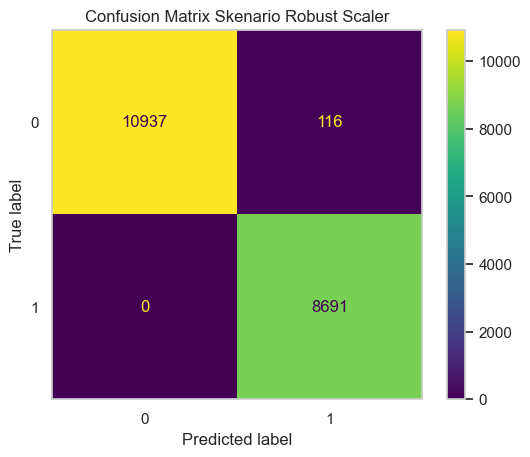

In [350]:
cm_skenario_5r = ConfusionMatrixDisplay.from_estimator(Model_et_5_Robust, X_test_5r, y_test_5r);
cm_skenario_5r.ax_.set_title('Confusion Matrix Skenario Robust Scaler')
plt.grid(False)

In [367]:
Model_et_5_Normalizer = Model_et 
Model_et_5_Normalizer.fit(X_train_5n, y_train_5n)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('extratreesclassifier',
                                        ExtraTreesClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'extratreesclassifier__criterion': ['gini', 'entropy',
                                                              'log_loss'],
                          'extratreesclassifier__n_estimators': range(25, 125, 25)}],
             verbose=1)

In [368]:
print("Normalizer")
print("Model Best Score: ", Model_et_5_Normalizer.best_score_)
print("Model Best Params: ", Model_et_5_Normalizer.best_params_)
print("======================================================")

Normalizer
Model Best Score:  0.9935042735042735
Model Best Params:  {'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 50}


In [369]:
train_pred_5n=Model_et_5_Normalizer.predict(X_train_5n)
train_accuracy_score_5n = accuracy_score(y_train_5n,train_pred_5n)
test_pred_5n=Model_et_5_Normalizer.predict(X_test_5n)
test_accuracy_score_5n = accuracy_score(y_test_5n,test_pred_5n)

print('Extra Trees Classifier')
print('Accuracy for Training set using accuracy score is')
print( 100*train_accuracy_score_5n)
print('----------------------------------')
print('Accuracy for Testing set using accuracy score is')
print( 100*test_accuracy_score_5n)

Extra Trees Classifier
Accuracy for Training set using accuracy score is
100.0
----------------------------------
Accuracy for Testing set using accuracy score is
99.4935170178282


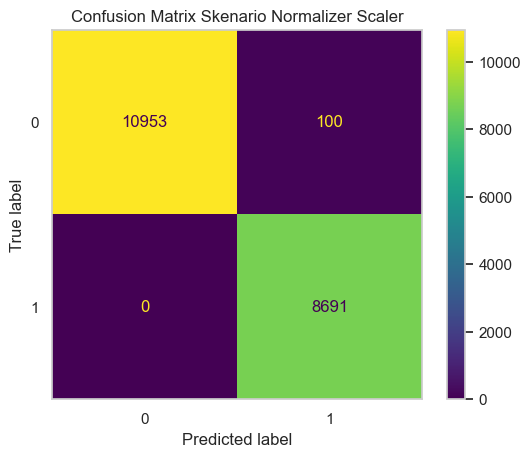

In [376]:
cm = ConfusionMatrixDisplay.from_estimator(Model_et_5_Normalizer, X_test_5n, y_test_5n);
cm.ax_.set_title('Confusion Matrix Skenario Normalizer Scaler')
plt.grid(False)

##### <b>Perbandingan Skenario Pengujian</b>

In [371]:
skenario = ["Skenario Awal (Seleksi Fitur, Oversampling, Standard Scaler)", "Tanpa GridSearchCV",
            "Tanpa Seleksi Fitur", "Tanpa Oversampling", "Normalisasi dengan MinMax Scaler", 
            "Normalisasi dengan Robust Scaler", "Normalisasi dengan Normalization"]
test_accuracy_skenario = [test_accuracy_score_et, test_accuracy_score_2, test_accuracy_score_3, 
                        test_accuracy_score_4, test_accuracy_score_5m, test_accuracy_score_5r, 
                        test_accuracy_score_5n]

In [372]:
test_accuracy_df = pd.DataFrame()
test_accuracy_df

""


In [373]:
test_accuracy_df["Skenario"] = skenario
test_accuracy_df["Akurasi"] = test_accuracy_skenario
test_accuracy_df

,Skenario,Akurasi
0,"Skenario Awal (Seleksi Fitur, Oversampling, St...",0.994125
1,Tanpa GridSearchCV,0.994125
2,Tanpa Seleksi Fitur,0.992960
3,Tanpa Oversampling,0.927383
4,Normalisasi dengan MinMax Scaler,0.994175
5,Normalisasi dengan Robust Scaler,0.994125
6,Normalisasi dengan Normalization,0.994935


In [374]:
test_accuracy_df.sort_values(by=["Akurasi"], ascending=False)

,Skenario,Akurasi
6,Normalisasi dengan Normalization,0.994935
4,Normalisasi dengan MinMax Scaler,0.994175
0,"Skenario Awal (Seleksi Fitur, Oversampling, St...",0.994125
1,Tanpa GridSearchCV,0.994125
5,Normalisasi dengan Robust Scaler,0.994125
2,Tanpa Seleksi Fitur,0.992960
3,Tanpa Oversampling,0.927383


##### <b>Kesimpulan Skenario Pengujian</b>

Skenario normalisasi dengan Normalization menempati akurasi tertinggi disusul dengan normalisasi MinMax Scaler.<br>
Sementara itu, skenario pengujian tanpa Cross Validation (GridSearchCV) dan normalisasi dengan Robust Scaler<br>
memiliki hasil yang sama dengan skenario awal. Dua skenario lainnya, yaitu tanpa Seleksi Fitur dan Oversampling<br>
menempati peringkat terakhir dengan skenario tanpa Oversampling berada di paling bawah<br>